In [1]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [2]:
##Library Imports

import os
import math
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import r2_score

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    make_scorer
)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from catboost import CatBoostClassifier 
from sklearn.preprocessing import StandardScaler
from catboost import Pool, cv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from keras.wrappers.scikit_learn import KerasClassifier
import keras.layers 
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import OneHotEncoder as ohc

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
data_train = pd.read_csv('Data_Train.csv')
data_test=pd.read_csv('Data_Test.csv')
df_train = data_train.copy()
df_test=data_test.copy()

In [4]:
display(df_train.head())
display(df_test.head())

ID  Asst_Reg GGGrade Experience       Validation  Yearly Income  \
0   95074    421802      II     >10yrs            Vfied      633600.00   
1  134131   3964312      IV       7yrs  Source Verified       85483.20   
2   92602   4247560     III       <1yr  Source Verified       79200.00   
3   22591    197179     III       <1yr            Vfied       61600.00   
4  125060   4646684       V       2yrs  Source Verified       68053.92   

  Home Status  Unpaid 2 years  Already Defaulted       Designation  \
0    MOR??AGE               0                  0   GLENDALE NISSAN   
1        REN?               0                  0  Business Teacher   
2        REN?               0                  0            driver   
3        REN?               0                  0          AvePoint   
4        REN?               0                  0       Lead Tester   

   Debt to Income  Postal Code  Lend Amount  Deprecatory Records  \
0         12.5496      91300.0     42023.25                    0   
1          9.0048      27400.0     38133.00                    0   
2         24.9144      32800.0     17100.00                    0   
3         16.5816       7000.0      5130.00                    0   
4         40.0512      70800.0     19665.00                    0   

   Interest Charged  Usage Rate  Inquiries  Present Balance  Gross Collection  \
0             15.39      88.924          3        607161.90               0.0   
1              9.94     102.856          0        269234.06               0.0   
2             22.35      60.372          0         22476.53               0.0   
3             10.36     116.272          1         15242.09               0.0   
4             13.68     127.280          1         65433.94               0.0   

   Sub GGGrade File Status       State  Account Open  Total Unpaid CL  \
0           19  fully paid  California            17          58598.0   
1           30       whole          NC            15          18924.0   
2           25       whole     Florida             7          15604.0   
3           22  fully paid   NewJersey             9          22410.0   
4           32  fully paid          LA            10          36022.0   

  Duration  Unpaid Amount               Reason Claim Type  Due Fee  \
0  3 years       31216.05  debt  consolidation          I      0.0   
1  5 years       11660.49  debt  consolidation          I      0.0   
2  5 years        5637.87      major  purchase          I      0.0   
3  3 years       15607.17      major  purchase          I      0.0   
4  5 years       27472.86  debt  consolidation          I      0.0   

   Loan/No Loan  
0             0  
1             0  
2             0  
3             1  
4             0

ID  Asst_Reg GGGrade Experience       Validation  Yearly Income  \
0  198980   1773284      II       2yrs  Source Verified      140800.00   
1  167688   5298273      II     >10yrs            Vfied      146080.00   
2  198768    189781      VI     >10yrs            Vfied      202222.24   
3  192564   1530906      II     >10yrs            Vfied      105600.00   
4  151199   4410316     III       4yrs        Not Vfied      151360.00   

  Home Status  Unpaid 2 years  Already Defaulted                  Designation  \
0         OWN               0                  0                    processor   
1    MOR??AGE               0                  0  Speech Language Pathologist   
2    MOR??AGE               0                  0                     Raytheon   
3    MOR??AGE               1                  0  Computer/Network Technician   
4    MOR??AGE               0                  0                     NDE Tech   

   Debt to Income  Postal Code  Lend Amount  Deprecatory Records  \
0         16.9176      90600.0     17955.00                    0   
1         28.6944      32300.0     59850.00                    0   
2         51.1560      88000.0     59850.00                    0   
3         27.0144      19900.0     19323.00                    0   
4         10.3824      34900.0     25350.75                    1   

   Interest Charged  Usage Rate  Inquiries  Present Balance  Gross Collection  \
0              8.88      78.432          1         59769.30               0.0   
1             10.10      76.368          1        532962.13               0.0   
2             19.30     157.552          2        288816.48               0.0   
3              8.82      32.852          2        424664.30               0.0   
4             13.52     108.532          1        251704.07               0.0   

   Sub GGGrade File Status       State  Account Open  Total Unpaid CL  \
0           17  fully paid  California            23          33532.0   
1           19       whole     Florida            17         149234.0   
2           37       whole          NM            15          70218.0   
3           19  fully paid          DE            18          79182.0   
4           25  fully paid     Florida             7          13612.0   

  Duration  Unpaid Amount               Reason Claim Type  Due Fee  
0  3 years       15755.94      major  purchase          I      0.0  
1  5 years       68237.55  debt  consolidation          I      0.0  
2  5 years       66272.76  debt  consolidation          I      0.0  
3  3 years       15595.20         credit  card          I      0.0  
4  3 years        8850.96  debt  consolidation          I      0.0

In [5]:
display(df_train.shape)
display(df_test.shape)

(87500, 30)

(37500, 29)

In [6]:
pd.concat([df_train.head(),df_train.sample(5),df_train.tail(5)])

ID  Asst_Reg GGGrade Experience       Validation  Yearly Income  \
0       95074    421802      II     >10yrs            Vfied      633600.00   
1      134131   3964312      IV       7yrs  Source Verified       85483.20   
2       92602   4247560     III       <1yr  Source Verified       79200.00   
3       22591    197179     III       <1yr            Vfied       61600.00   
4      125060   4646684       V       2yrs  Source Verified       68053.92   
47324   93816   6227016      II       3yrs  Source Verified      100320.00   
57167  127224   5352200       V       2yrs  Source Verified      246400.00   
74163   82986   1671256     III       9yrs            Vfied      228800.00   
29236   36791   4127898     III       <1yr            Vfied       58080.00   
42114   29138   3113703       I       4yrs        Not Vfied      170720.00   
87495  120884   4535984      II     >10yrs        Not Vfied       75680.00   
87496   33259   2624710      IV       3yrs  Source Verified       90423.52   
87497  102153   5966919      II     >10yrs  Source Verified       91520.00   
87498  115343   2630667     III       1yrs  Source Verified       61600.00   
87499  104968   6637289     III       2yrs            Vfied            NaN   

      Home Status  Unpaid 2 years  Already Defaulted  \
0        MOR??AGE               0                  0   
1            REN?               0                  0   
2            REN?               0                  0   
3            REN?               0                  0   
4            REN?               0                  0   
47324        REN?               0                  0   
57167         OWN               0                  0   
74163    MOR??AGE               0                  0   
29236    MOR??AGE               0                  0   
42114    MOR??AGE               0                  0   
87495        REN?               0                  0   
87496        REN?               0                  0   
87497    MOR??AGE               0                  0   
87498    MOR??AGE               0                  0   
87499        REN?               0                  0   

                              Designation  Debt to Income  Postal Code  \
0                         GLENDALE NISSAN         12.5496      91300.0   
1                        Business Teacher          9.0048      27400.0   
2                                  driver         24.9144      32800.0   
3                                AvePoint         16.5816       7000.0   
4                             Lead Tester         40.0512      70800.0   
47324  Senior Municipal Financial Analyst         21.1512      11200.0   
57167           Vp of international sales         24.8304      91900.0   
74163       Vice President Process Design         11.9112      60400.0   
29236                          Office Mgr         41.2440      30100.0   
42114                               owner         10.5168      44100.0   
87495                 Engineer Support II         19.3200      48000.0   
87496                    Dental Hygienist         48.8208       1400.0   
87497               Interface Coordinator          7.7952       6400.0   
87498                         PARTS CLERK          8.2992      16800.0   
87499                   Outside sales rep         15.1872      92800.0   

       Lend Amount  Deprecatory Records  Interest Charged  Usage Rate  \
0         42023.25                    0             15.39      88.924   
1         38133.00                    0              9.94     102.856   
2         17100.00                    0             22.35      60.372   
3          5130.00                    0             10.36     116.272   
4         19665.00                    0             13.68     127.280   
47324     12825.00                    0             11.13     108.704   
57167     59850.00                    0             16.97      44.720   
74163     17655.75                    1             11.97      30.960   
29236     17100.00     

In [7]:
pd.concat([df_test.head(),df_train.sample(5),df_train.tail(5)])

ID  Asst_Reg GGGrade Experience       Validation  Yearly Income  \
0      198980   1773284      II       2yrs  Source Verified      140800.00   
1      167688   5298273      II     >10yrs            Vfied      146080.00   
2      198768    189781      VI     >10yrs            Vfied      202222.24   
3      192564   1530906      II     >10yrs            Vfied      105600.00   
4      151199   4410316     III       4yrs        Not Vfied      151360.00   
70186   91418   5128076      II       <1yr  Source Verified      264000.00   
45734   65032   3958294     III       <1yr            Vfied      125899.84   
81458   25715    813237      VI       6yrs            Vfied       38016.00   
49731  127855   7033051       I       9yrs            Vfied            NaN   
44801   37107   5699551     III       <1yr  Source Verified       42240.00   
87495  120884   4535984      II     >10yrs        Not Vfied       75680.00   
87496   33259   2624710      IV       3yrs  Source Verified       90423.52   
87497  102153   5966919      II     >10yrs  Source Verified       91520.00   
87498  115343   2630667     III       1yrs  Source Verified       61600.00   
87499  104968   6637289     III       2yrs            Vfied            NaN   

      Home Status  Unpaid 2 years  Already Defaulted  \
0             OWN               0                  0   
1        MOR??AGE               0                  0   
2        MOR??AGE               0                  0   
3        MOR??AGE               1                  0   
4        MOR??AGE               0                  0   
70186    MOR??AGE               0                  0   
45734    MOR??AGE               0                  0   
81458        REN?               0                  0   
49731         OWN               0                  0   
44801        REN?               0                  0   
87495        REN?               0                  0   
87496        REN?               0                  0   
87497    MOR??AGE               0                  0   
87498    MOR??AGE               0                  0   
87499        REN?               0                  0   

                       Designation  Debt to Income  Postal Code  Lend Amount  \
0                        processor         16.9176      90600.0     17955.00   
1      Speech Language Pathologist         28.6944      32300.0     59850.00   
2                         Raytheon         51.1560      88000.0     59850.00   
3      Computer/Network Technician         27.0144      19900.0     19323.00   
4                         NDE Tech         10.3824      34900.0     25350.75   
70186           IT Project Manager         20.3616      94500.0     34200.00   
45734            Adjunct Professor         37.8000      21000.0     34200.00   
81458                         IHOP         48.6192      78700.0      8550.00   
49731                 Truck Driver         14.9184      23400.0     23085.00   
44801              Pharmacy Intern         37.0608      80200.0     13680.00   
87495          Engineer Support II         19.3200      48000.0     10260.00   
87496             Dental Hygienist         48.8208       1400.0     27360.00   
87497        Interface Coordinator          7.7952       6400.0      8550.00   
87498                  PARTS CLERK          8.2992      16800.0     23769.00   
87499            Outside sales rep         15.1872      92800.0     28471.50   

       Deprecatory Records  Interest Charged  Usage Rate  Inquiries  \
0                        0              8.88      78.432          1   
1                        0             10.10      76.368          1   
2                        0             19.30     157.552          2   
3                        0              8.82      32.852          2   
4                        1             13.52     108.532          1   
70186                    0             14.53      61.404          1   
45734                    1             21.17      66.564          1   
81458           

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly Income        81925 non-null  float64
 6   Home Status          87500 non-null  object 
 7   Unpaid 2 years       87500 non-null  int64  
 8   Already Defaulted    87500 non-null  int64  
 9   Designation          86086 non-null  object 
 10  Debt to Income       84011 non-null  float64
 11  Postal Code          86111 non-null  float64
 12  Lend Amount          87500 non-null  float64
 13  Deprecatory Records  87500 non-null  int64  
 14  Interest Charged     87500 non-null  float64
 15  Usage Rate           87500 non-null 

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   37500 non-null  int64  
 1   Asst_Reg             37500 non-null  int64  
 2   GGGrade              37500 non-null  object 
 3   Experience           37500 non-null  object 
 4   Validation           37500 non-null  object 
 5   Yearly Income        35075 non-null  float64
 6   Home Status          37500 non-null  object 
 7   Unpaid 2 years       37500 non-null  int64  
 8   Already Defaulted    37500 non-null  int64  
 9   Designation          36914 non-null  object 
 10  Debt to Income       35989 non-null  float64
 11  Postal Code          36889 non-null  float64
 12  Lend Amount          37500 non-null  float64
 13  Deprecatory Records  37500 non-null  int64  
 14  Interest Charged     37500 non-null  float64
 15  Usage Rate           37500 non-null 

In [10]:
display(df_train.describe(include='all').T)
display(df_train.describe(include='float').T)
df_train.describe(include='object').T

count unique                  top   freq  \
ID                   87500.0    NaN                  NaN    NaN   
Asst_Reg             87500.0    NaN                  NaN    NaN   
GGGrade                87500      7                   II  24966   
Experience             87500     11               >10yrs  30849   
Validation             87500      3      Source Verified  34504   
Yearly Income        81925.0    NaN                  NaN    NaN   
Home Status            87500      5             MOR??AGE  44160   
Unpaid 2 years       87500.0    NaN                  NaN    NaN   
Already Defaulted    87500.0    NaN                  NaN    NaN   
Designation            86086  40354       School Teacher   1585   
Debt to Income       84011.0    NaN                  NaN    NaN   
Postal Code          86111.0    NaN                  NaN    NaN   
Lend Amount          87500.0    NaN                  NaN    NaN   
Deprecatory Records  87500.0    NaN                  NaN    NaN   
Interest Charged     87500.0    NaN                  NaN    NaN   
Usage Rate           87500.0    NaN                  NaN    NaN   
Inquiries            87500.0    NaN                  NaN    NaN   
Present Balance      87500.0    NaN                  NaN    NaN   
Gross Collection     87500.0    NaN                  NaN    NaN   
Sub GGGrade          87500.0    NaN                  NaN    NaN   
File Status            87500      2                whole  46300   
State                  87500     49           California  12625   
Account Open         87500.0    NaN                  NaN    NaN   
Total Unpaid CL      83314.0    NaN                  NaN    NaN   
Duration               87500      2              3 years  60061   
Unpaid Amount        82648.0    NaN                  NaN    NaN   
Reason                 87500     13  debt  consolidation  52559   
Claim Type             87500      2                    I  87454   
Due Fee              87500.0    NaN                  NaN    NaN   
Loan/No Loan         87500.0    NaN                  NaN    NaN   

                               mean             std      min         25%  \
ID                     83946.253509     36100.10295  21560.0    52616.75   
Asst_Reg             3798914.124149  2289038.082588  24847.0  1483874.25   
GGGrade                         NaN             NaN      NaN         NaN   
Experience                      NaN             NaN      NaN         NaN   
Validation                      NaN             NaN      NaN         NaN   
Yearly Income          134859.62978    98824.725562   8800.0   83246.592   
Home Status                     NaN             NaN      NaN         NaN   
Unpaid 2 years             0.332937         0.87608      0.0         0.0   
Already Defaulted          0.005726        0.083505      0.0         0.0   
Designation                     NaN             NaN      NaN         NaN   
Debt to Income             30.94266       14.079813      0.0     20.4288   
Postal Code            51155.385491     31211.22993   1000.0     22900.0   
Lend Amount             25920.53568    14433.837213   1710.0     15048.0   
Deprecatory Records          0.2024        0.646414      0.0         0.0   
Interest Charged          16.518375        4.902011      8.0       12.31   
Usage Rate                95.517348       40.554035      0.0      66.048   
Inquiries                   0.67064        0.959572      0.0         0.0   
Present Balance       236389.464783   255056.781907      0.0    51734.93   
Gross Collection          39.461697      391.919578      0.0         0.0   
Sub GGGrade               22.024891        6.452697     11.0        17.0   
File Status                     NaN             NaN      NaN         NaN   
State                           NaN             NaN      NaN         NaN   
Account Open               12.77944         5.37116      2.0         9.0   
Total Unpaid CL        53268.640394    53255.513914    332.0     23240.0   
Duration                        NaN          

count           mean            std     min         25%  \
Yearly Income     81925.0  134859.629780   98824.725562  8800.0  83246.5920   
Debt to Income    84011.0      30.942660      14.079813     0.0     20.4288   
Postal Code       86111.0   51155.385491   31211.229930  1000.0  22900.0000   
Lend Amount       87500.0   25920.535680   14433.837213  1710.0  15048.0000   
Interest Charged  87500.0      16.518375       4.902011     8.0     12.3100   
Usage Rate        87500.0      95.517348      40.554035     0.0     66.0480   
Present Balance   87500.0  236389.464783  255056.781907     0.0  51734.9300   
Gross Collection  87500.0      39.461697     391.919578     0.0      0.0000   
Total Unpaid CL   83314.0   53268.640394   53255.513914   332.0  23240.0000   
Unpaid Amount     82648.0   29556.494524   37456.245062     0.0  11446.7400   
Due Fee           87500.0       0.316407       3.546087     0.0      0.0000   

                          50%          75%           max  
Yearly Income     114400.0000  160160.0000  8.264031e+06  
Debt to Income        30.1392      40.9080  6.392904e+02  
Postal Code        47700.0000   80200.0000  9.990000e+04  
Lend Amount        23940.0000   34200.0000  5.985000e+04  
Interest Charged      16.4900      20.7700  2.500000e+01  
Usage Rate            97.0080     126.5920  1.534756e+03  
Present Balance   138806.2250  353475.5400  5.629234e+06  
Gross Collection       0.0000       0.0000  2.630847e+04  
Total Unpaid CL    39674.0000   66400.0000  1.710630e+06  
Unpaid Amount      20892.7800   36449.0775  1.338778e+06  
Due Fee                0.0000       0.0000  1.690500e+02

count unique                  top   freq
GGGrade      87500      7                   II  24966
Experience   87500     11               >10yrs  30849
Validation   87500      3      Source Verified  34504
Home Status  87500      5             MOR??AGE  44160
Designation  86086  40354       School Teacher   1585
File Status  87500      2                whole  46300
State        87500     49           California  12625
Duration     87500      2              3 years  60061
Reason       87500     13  debt  consolidation  52559
Claim Type   87500      2                    I  87454

In [11]:
try:
    df_train.drop(['ID'], axis=1, inplace=True)
except:
    print("ID column already dropped")
df_train.columns

Index(['Asst_Reg', 'GGGrade', 'Experience', 'Validation', 'Yearly Income',
       'Home Status', 'Unpaid 2 years', 'Already Defaulted', 'Designation',
       'Debt to Income', 'Postal Code', 'Lend Amount', 'Deprecatory Records',
       'Interest Charged', 'Usage Rate', 'Inquiries', 'Present Balance',
       'Gross Collection', 'Sub GGGrade', 'File Status', 'State',
       'Account Open', 'Total Unpaid CL', 'Duration', 'Unpaid Amount',
       'Reason', 'Claim Type', 'Due Fee', 'Loan/No Loan'],
      dtype='object')

In [12]:
df_train.isnull().sum().sort_values(ascending=False)

Yearly Income          5575
Unpaid Amount          4852
Total Unpaid CL        4186
Debt to Income         3489
Designation            1414
Postal Code            1389
Asst_Reg                  0
Gross Collection          0
Due Fee                   0
Claim Type                0
Reason                    0
Duration                  0
Account Open              0
State                     0
File Status               0
Sub GGGrade               0
Usage Rate                0
Present Balance           0
Inquiries                 0
GGGrade                   0
Interest Charged          0
Deprecatory Records       0
Lend Amount               0
Already Defaulted         0
Unpaid 2 years            0
Home Status               0
Validation                0
Experience                0
Loan/No Loan              0
dtype: int64

In [13]:
df_test.isnull().sum().sort_values(ascending=False)

Yearly Income          2425
Unpaid Amount          2069
Total Unpaid CL        1814
Debt to Income         1511
Postal Code             611
Designation             586
ID                        0
Present Balance           0
Claim Type                0
Reason                    0
Duration                  0
Account Open              0
State                     0
File Status               0
Sub GGGrade               0
Gross Collection          0
Interest Charged          0
Inquiries                 0
Usage Rate                0
Asst_Reg                  0
Deprecatory Records       0
Lend Amount               0
Already Defaulted         0
Unpaid 2 years            0
Home Status               0
Validation                0
Experience                0
GGGrade                   0
Due Fee                   0
dtype: int64

In [14]:
df_train.duplicated().sum()

0

In [15]:
df_test.duplicated().sum()

0

In [16]:
df_train['Home Status'].replace(['MOR??AGE','REN?'], ['Mortgage','Rent'], inplace = True)

In [17]:
df_test['Home Status'].replace(['MOR??AGE','REN?'], ['Mortgage','Rent'], inplace = True)

In [18]:
cat_cols1 = df_train.select_dtypes(include='object').columns
df_train[cat_cols1] = df_train[cat_cols1].astype('category')
df_train.select_dtypes(include='category').columns

Index(['GGGrade', 'Experience', 'Validation', 'Home Status', 'Designation',
       'File Status', 'State', 'Duration', 'Reason', 'Claim Type'],
      dtype='object')

In [19]:
cat_cols2 = df_test.select_dtypes(include='object').columns
df_test[cat_cols2] = df_test[cat_cols2].astype('category')
df_test.select_dtypes(include='category').columns

Index(['GGGrade', 'Experience', 'Validation', 'Home Status', 'Designation',
       'File Status', 'State', 'Duration', 'Reason', 'Claim Type'],
      dtype='object')

In [20]:
for i in df_train.select_dtypes(include=['category']).columns:
    print('Unique values in', i, 'are :')
    print(df_train[i].value_counts(dropna=False))
    print('*'*50)

Unique values in GGGrade are :
II     24966
III    24652
I      14171
IV     13867
V       7154
VI      2192
VII      498
Name: GGGrade, dtype: int64
**************************************************
Unique values in Experience are :
>10yrs    30849
2yrs       8064
3yrs       7350
<1yr       7209
1yrs       5853
5yrs       5623
4yrs       5324
7yrs       4762
8yrs       4604
6yrs       4255
9yrs       3607
Name: Experience, dtype: int64
**************************************************
Unique values in Validation are :
Source Verified    34504
Vfied              26642
Not Vfied          26354
Name: Validation, dtype: int64
**************************************************
Unique values in Home Status are :
Mortgage    44160
Rent        34914
OWN          8416
OTHER           6
NONE            4
Name: Home Status, dtype: int64
**************************************************
Unique values in Designation are :
School Teacher                             1585
NaN                      

# Exploratory Data Analysis

### **Univariate Analysis**

In [21]:
def histogram_boxplot(feature, figsize=(15, 7), bins=None):
    """ 
    Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15,10))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='yellow') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=True, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=True, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='blue', linestyle='-');# Add median to the histogram

In [22]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=df_train, palette='mako')
    plt.xticks(rotation=90)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        # percentage of each class of the category
        percentage = 100 * p.get_height()/total
        percentage_label = f"{percentage:.1f}%"
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage_label, (x, y), size = 12) # annotate the percantage
        
    plt.show() # show the plot

In [23]:
### Function to plot distributions and Boxplots of customers
def target_plot(x, target='Loan/No Loan'):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    fig,axs = plt.subplots(2, 2, figsize=(12,10))
    axs[0, 0].set_title('Distribution of Loan')
    sns.distplot(df_train[(df_train[target] == 1)][x], ax=axs[0,0], color='teal')
    axs[0, 1].set_title('Distribution of No Loan')
    sns.distplot(df_train[(d_train[target] == 0)][x], ax=axs[0,1], color='orange')
    
    axs[1,0].set_title('Boxplot w.r.t Loan/No Loan')
    sns.boxplot(df_train[target],data[x], ax=axs[1,0],palette='gist_rainbow')
    axs[1,1].set_title('Boxplot w.r.t No Loan - Without outliers')
    sns.boxplot(df_train[target],df_train[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow')
    plt.tight_layout()
    plt.show()

In [24]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

In [25]:
# custom function for easy and efficient analysis of numerical univariate
def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
     # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev
    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

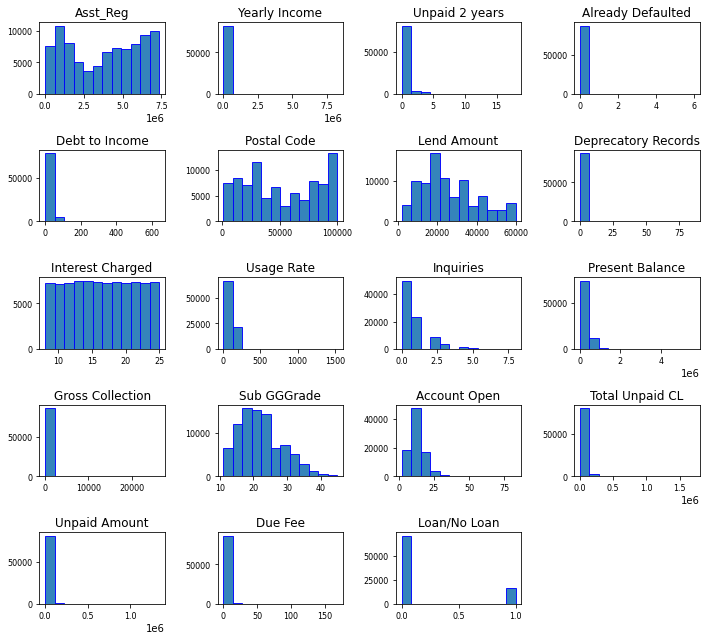

In [26]:
df_train.hist(figsize=(10,9), bins=12, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout()
plt.show()

In [27]:
numeric=[df_train.select_dtypes(include=['integer','float']).columns]
numeric

[Index(['Asst_Reg', 'Yearly Income', 'Unpaid 2 years', 'Already Defaulted',
        'Debt to Income', 'Postal Code', 'Lend Amount', 'Deprecatory Records',
        'Interest Charged', 'Usage Rate', 'Inquiries', 'Present Balance',
        'Gross Collection', 'Sub GGGrade', 'Account Open', 'Total Unpaid CL',
        'Unpaid Amount', 'Due Fee', 'Loan/No Loan'],
       dtype='object')]

In [28]:
assets=['Asst_Reg','Yearly Income','Present Balance']
unpaid=['Unpaid 2 years','Total Unpaid CL','Unpaid Amount','Due Fee']
other_debt_related_item=['Debt to Income','Lend Amount','Interest Charged', 'Usage Rate']

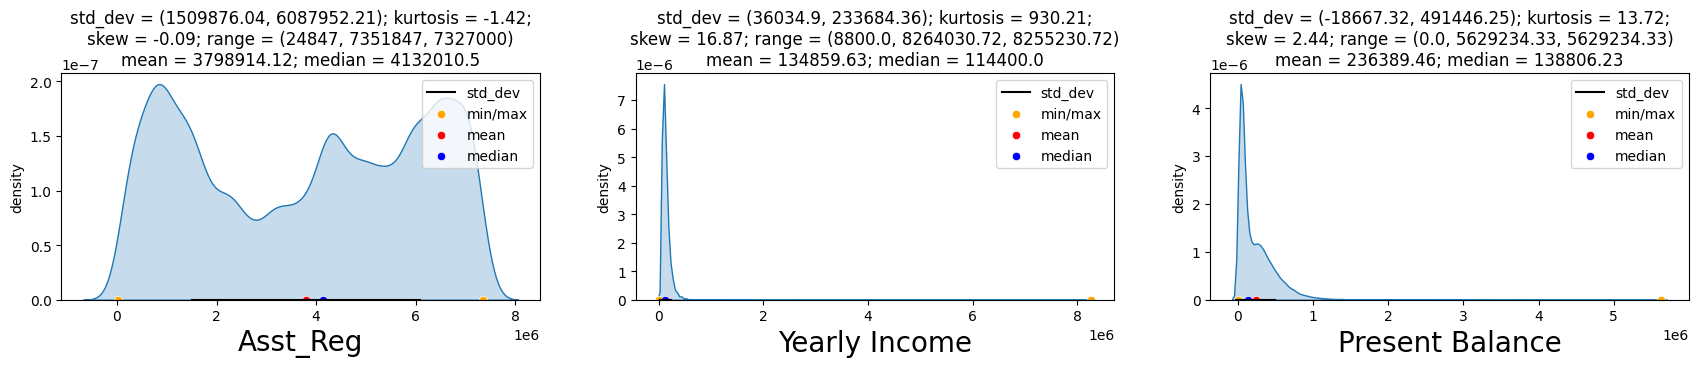

In [29]:
UVA_numeric(df_train,assets)

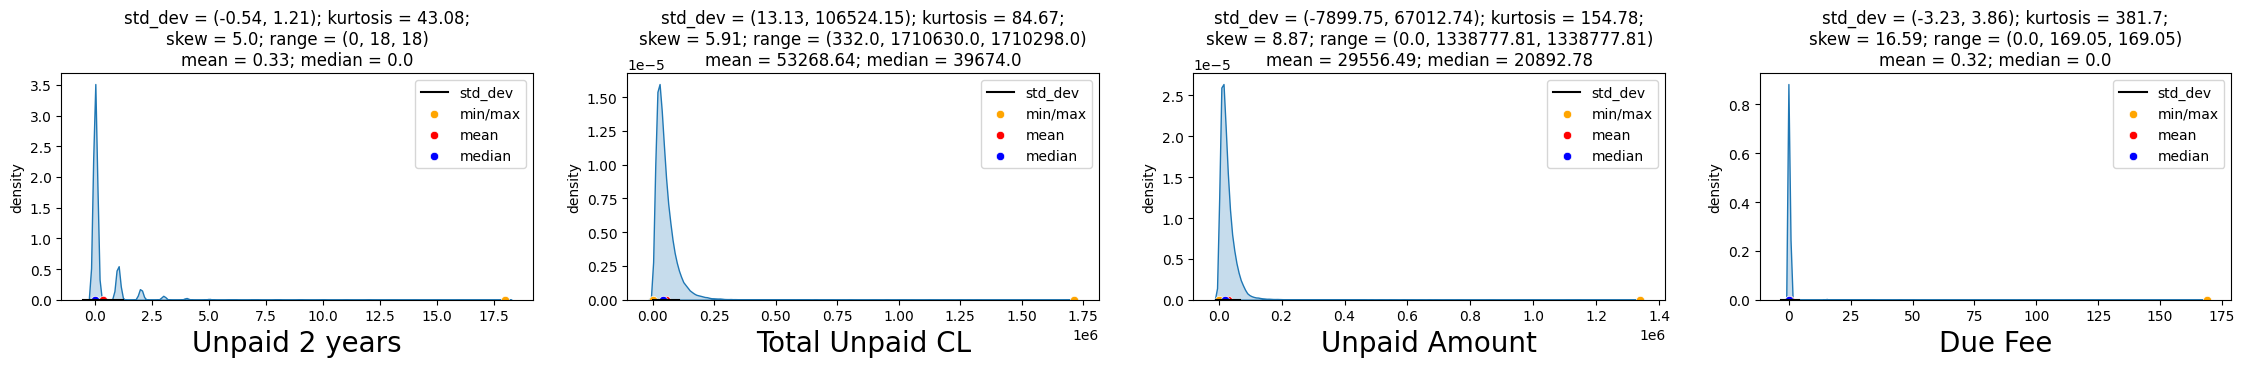

In [30]:
UVA_numeric(df_train,unpaid)

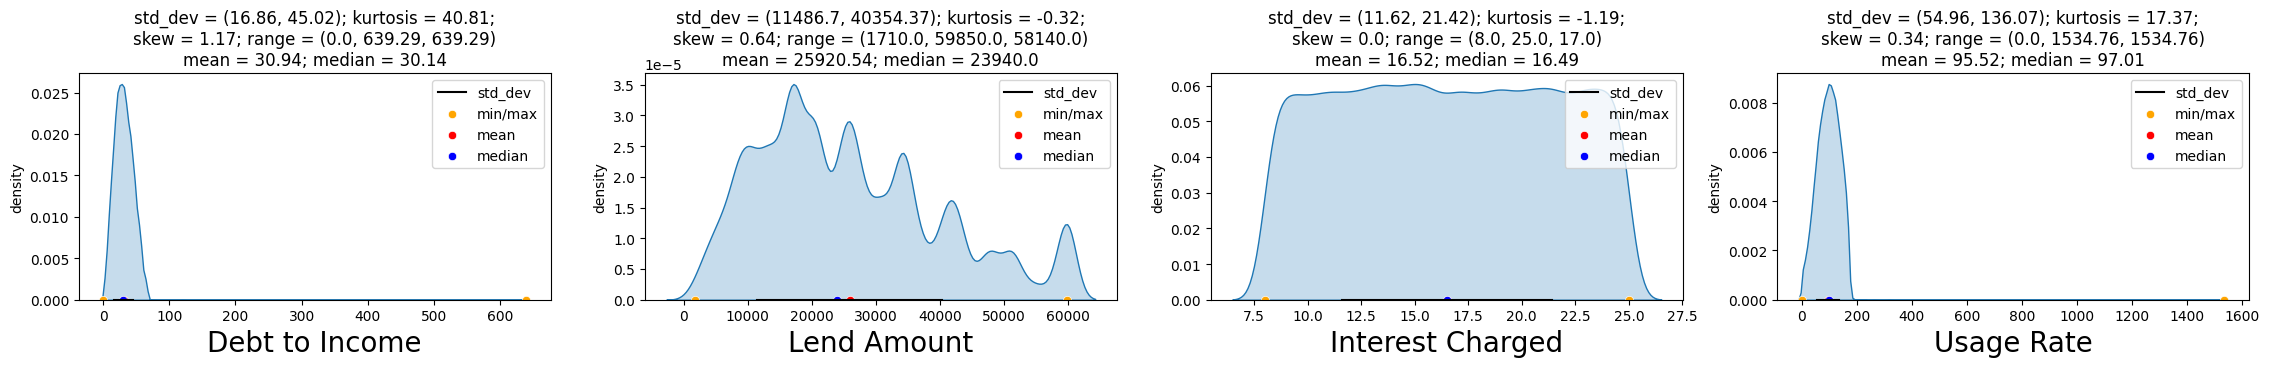

In [31]:
UVA_numeric(df_train,other_debt_related_item)

In [32]:
cat=[df_train.select_dtypes(include=['category']).columns]
cat

[Index(['GGGrade', 'Experience', 'Validation', 'Home Status', 'Designation',
        'File Status', 'State', 'Duration', 'Reason', 'Claim Type'],
       dtype='object')]

In [33]:
grade=['GGGrade','State','Reason']
claim_status=['File Status','Duration','Claim Type']
Jexp_home=['Experience', 'Validation', 'Home Status']

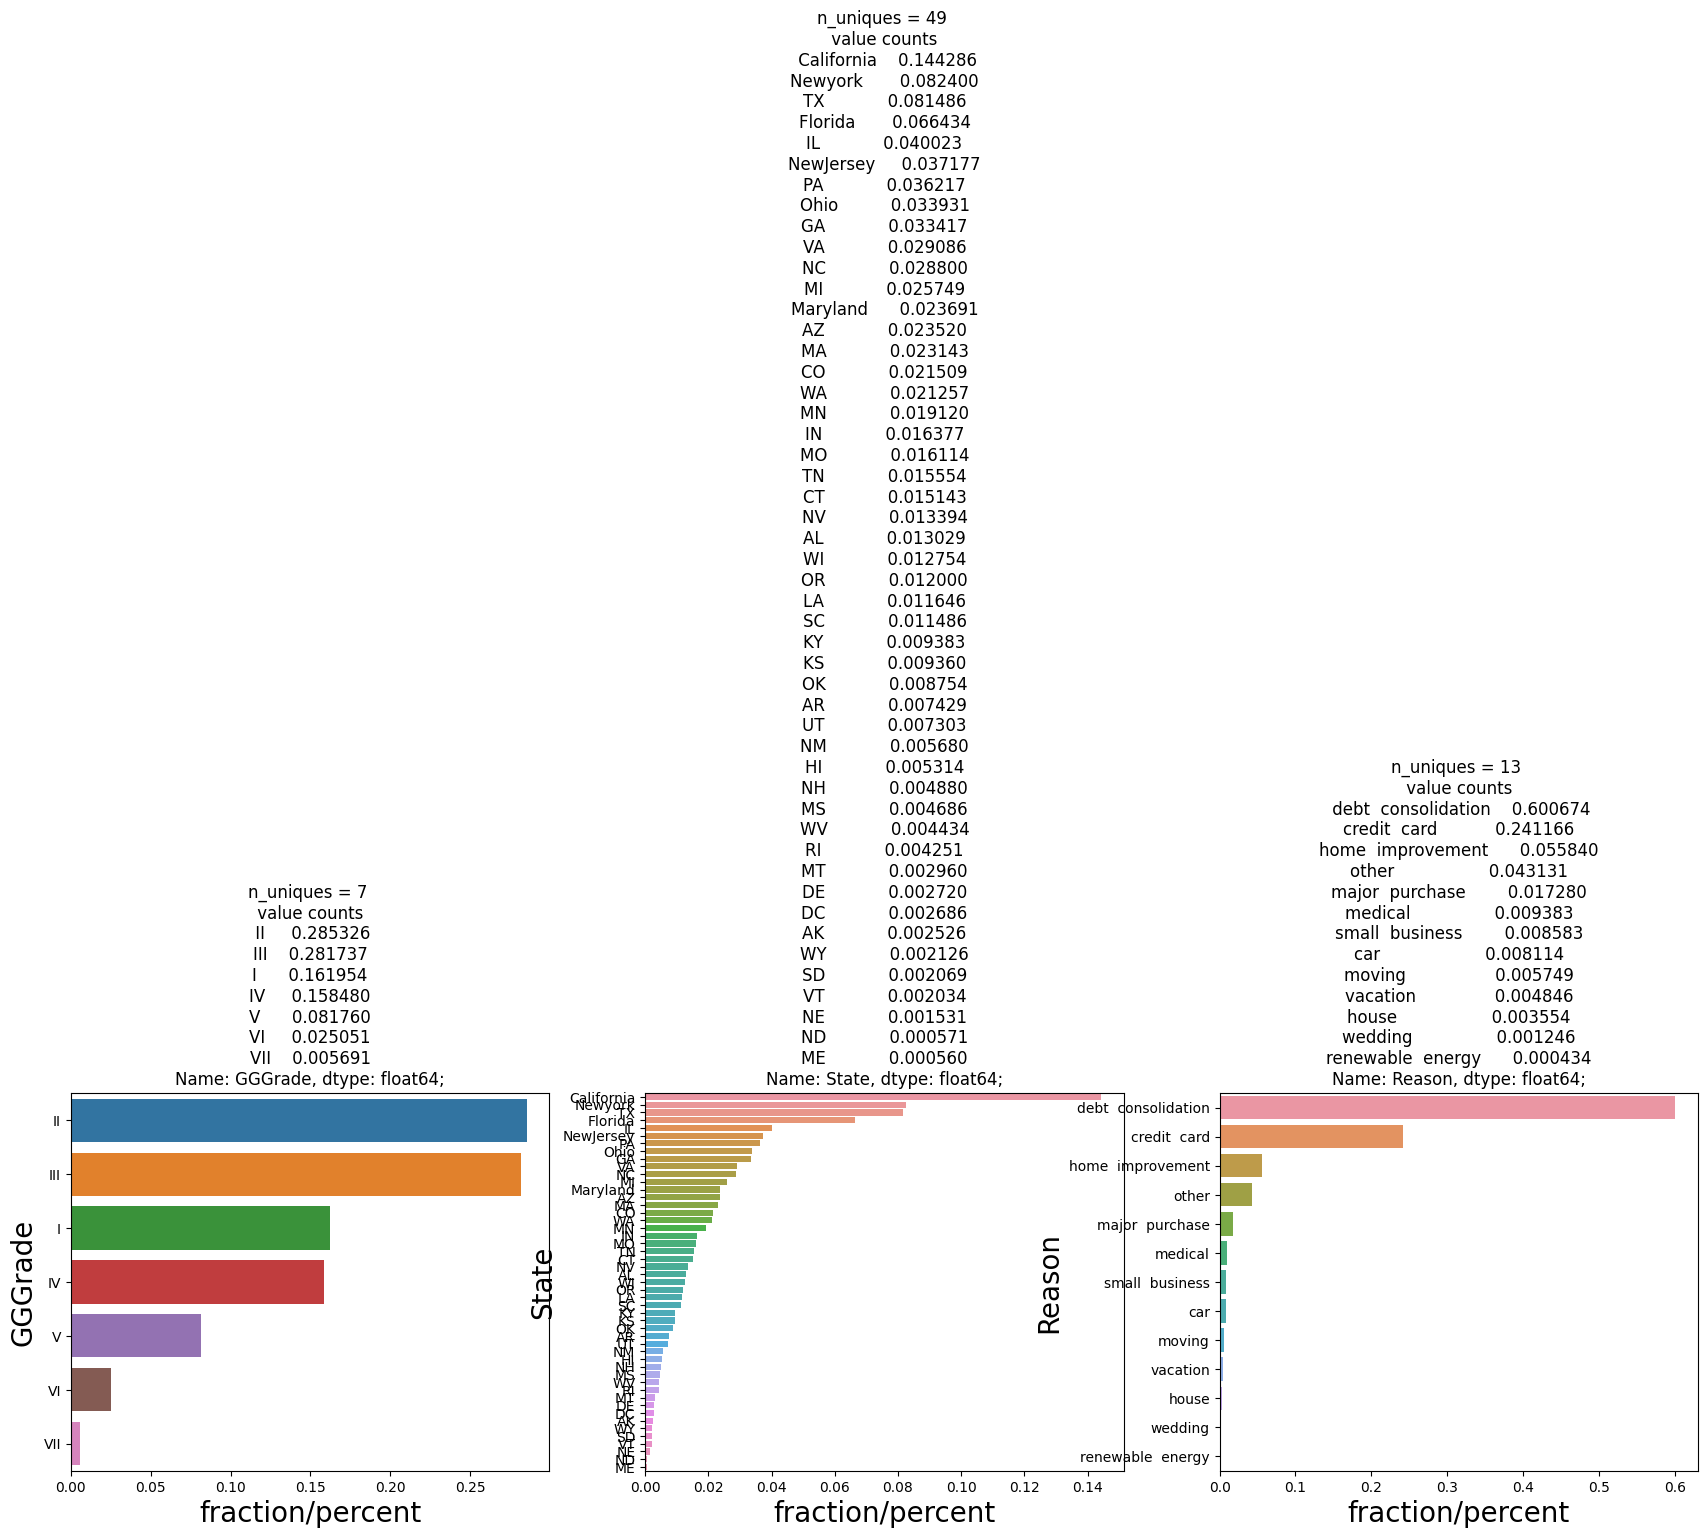

In [34]:
UVA_category(df_train,grade)

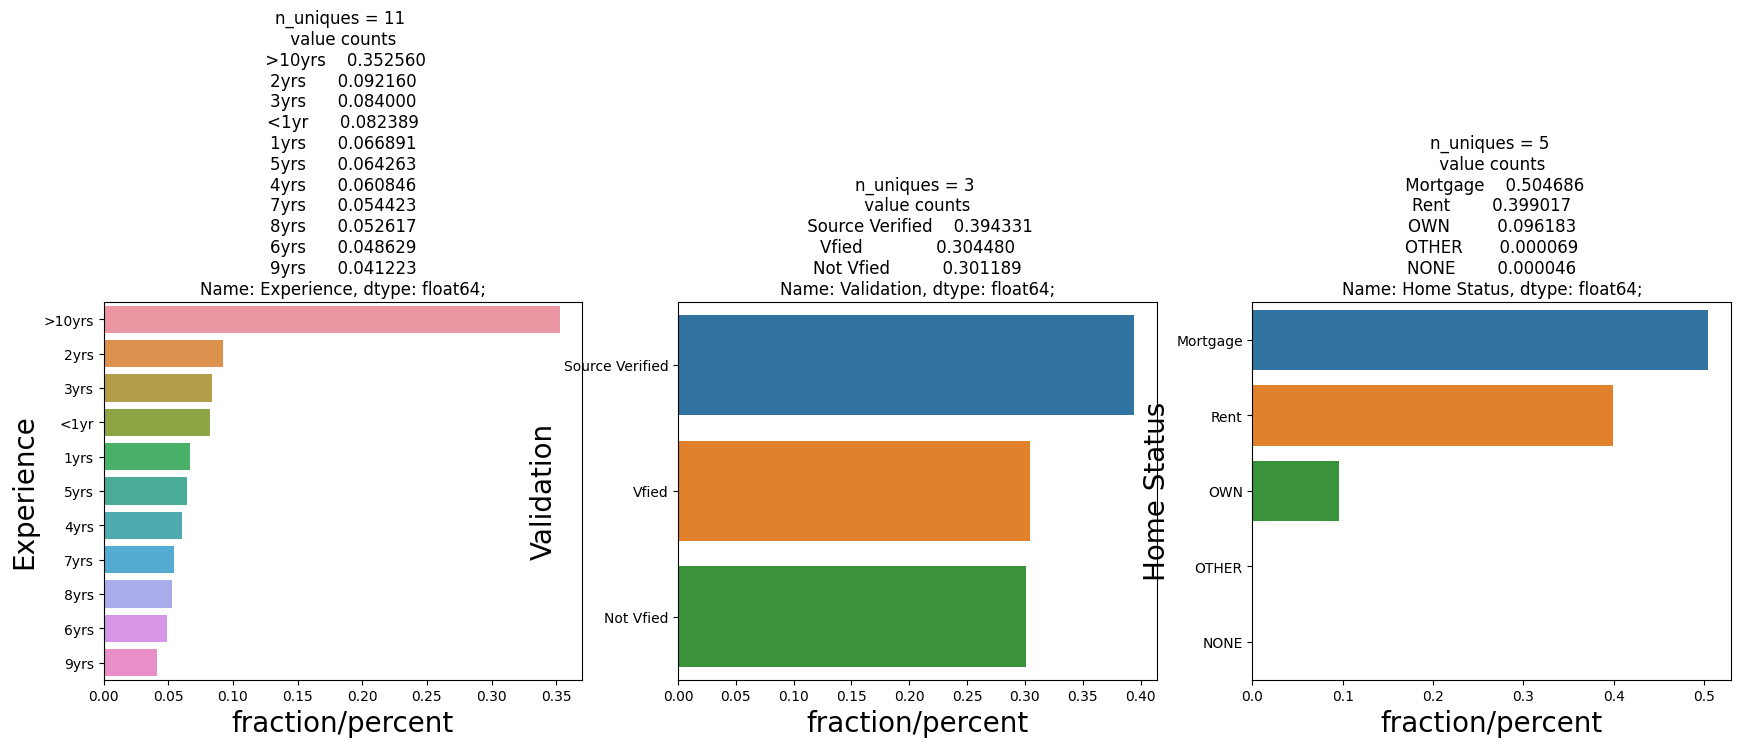

In [35]:
UVA_category(df_train,Jexp_home)

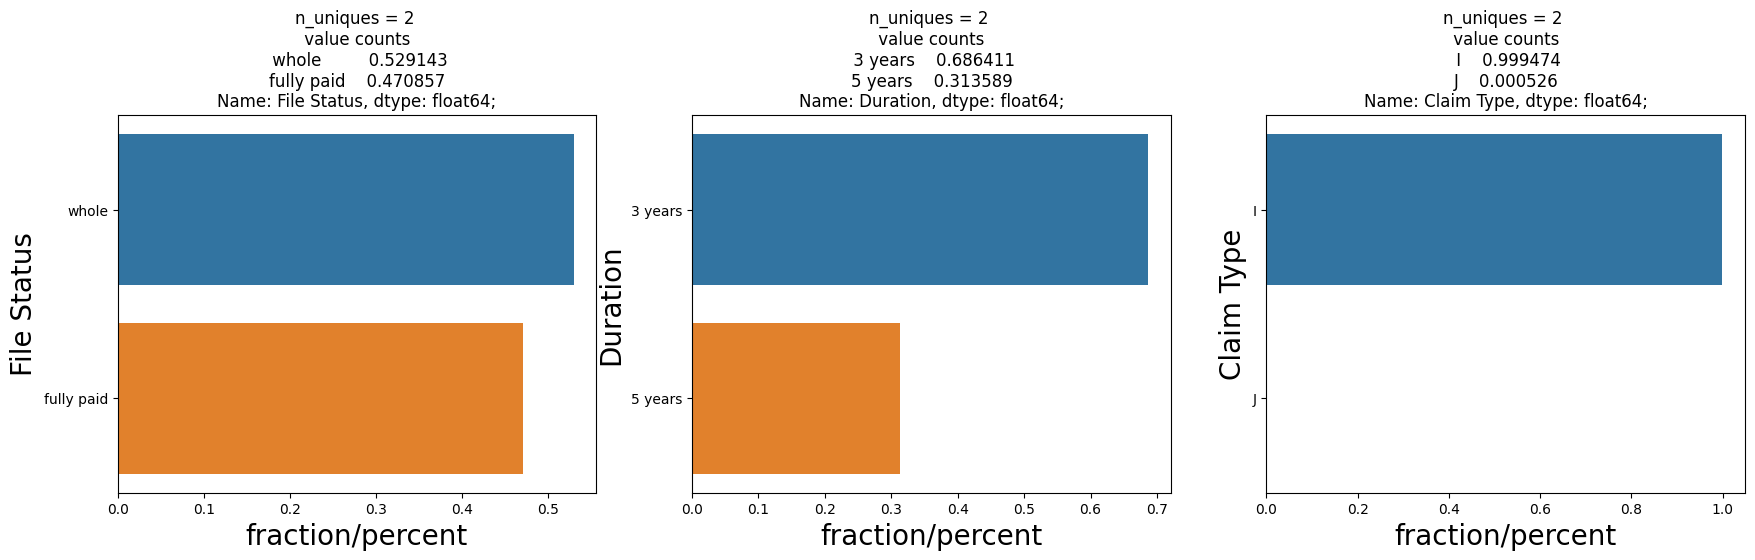

In [36]:
UVA_category(df_train,claim_status)

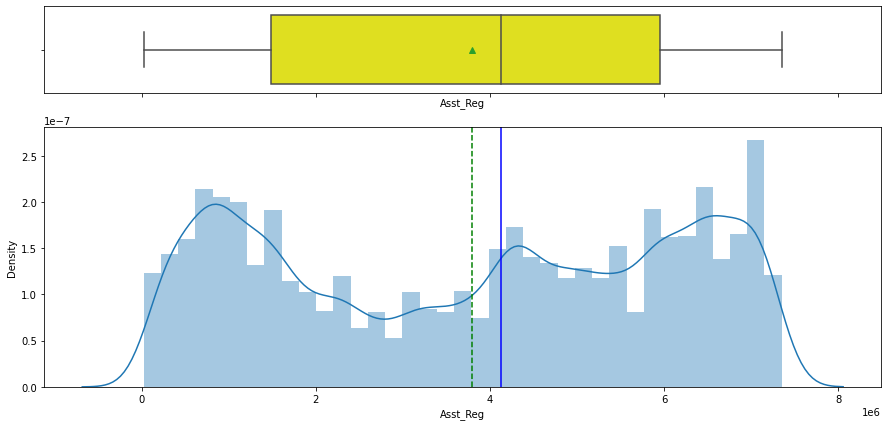

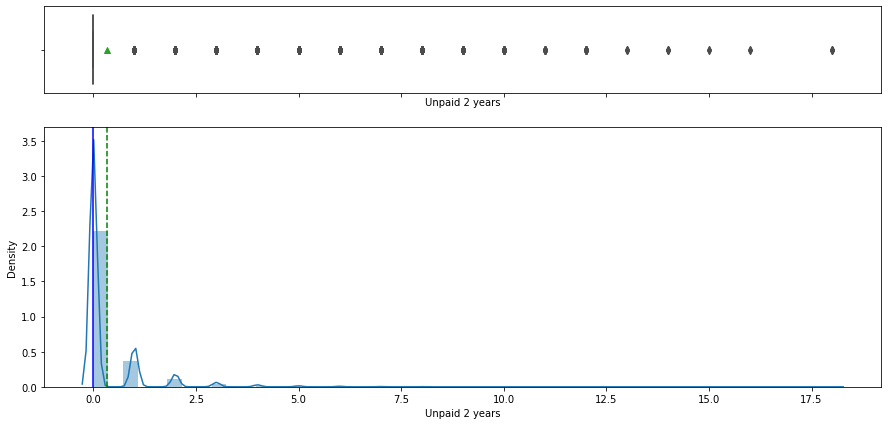

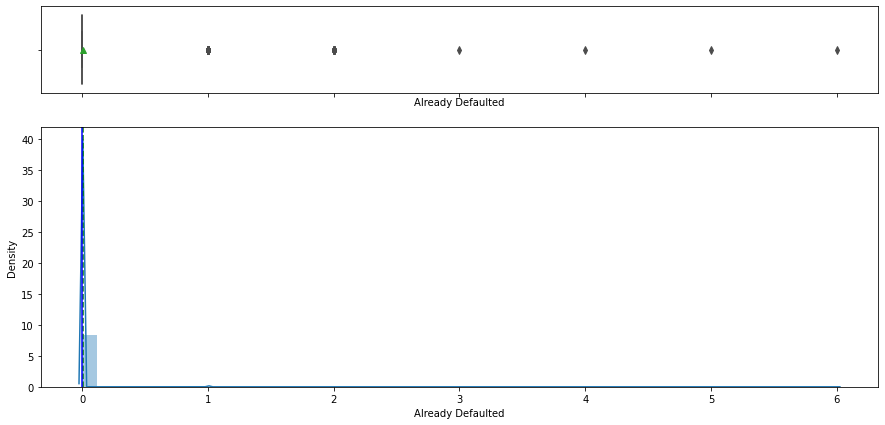

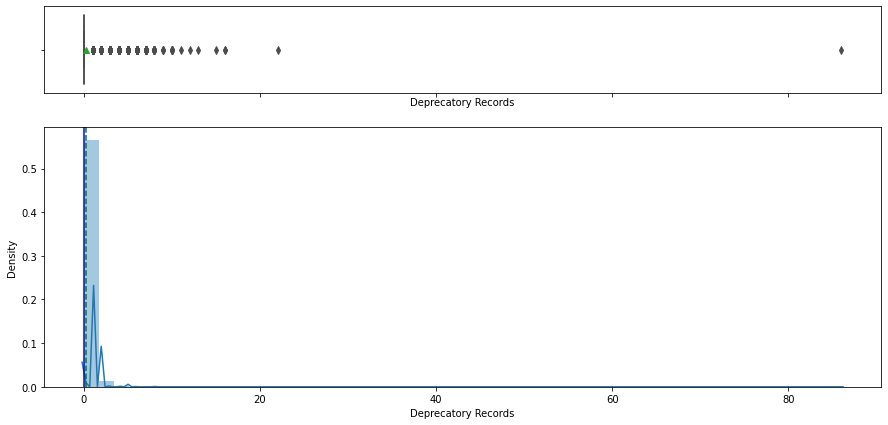

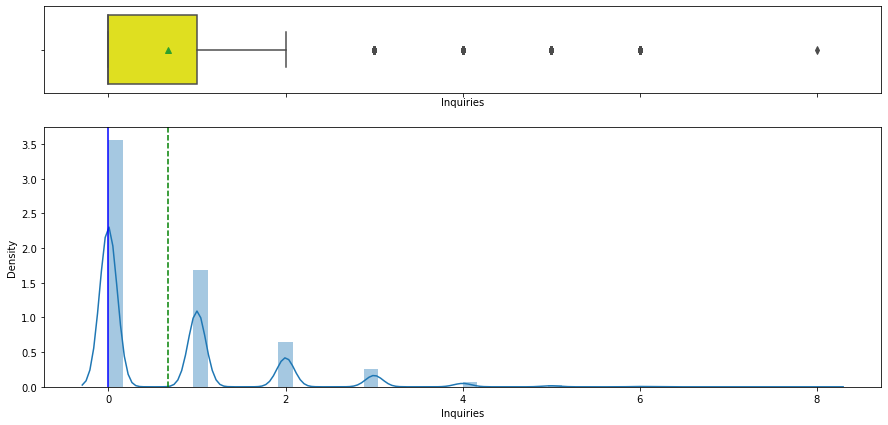

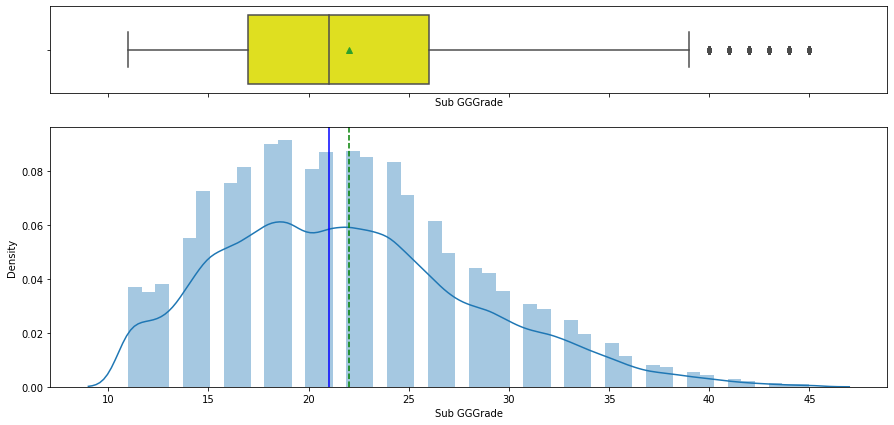

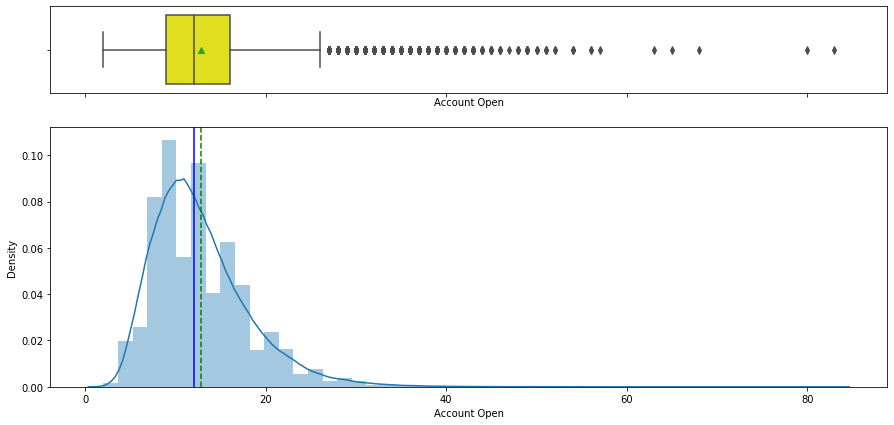

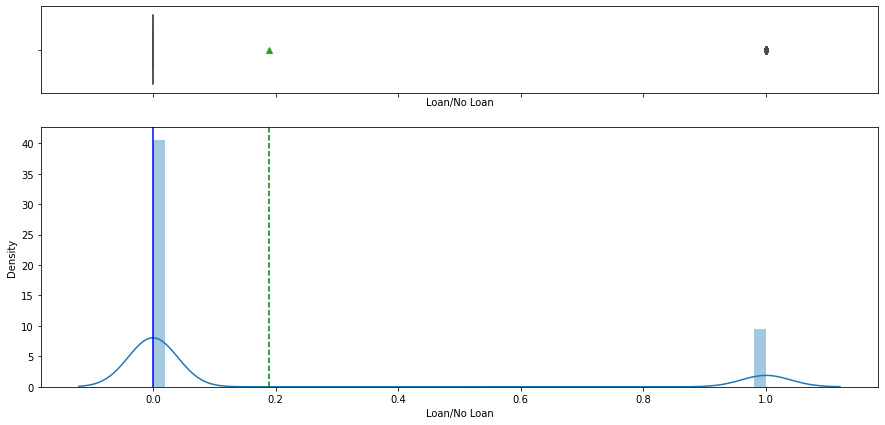

In [37]:
for col in df_train.select_dtypes(include=["integer"]).columns:
    histogram_boxplot(df_train[col])

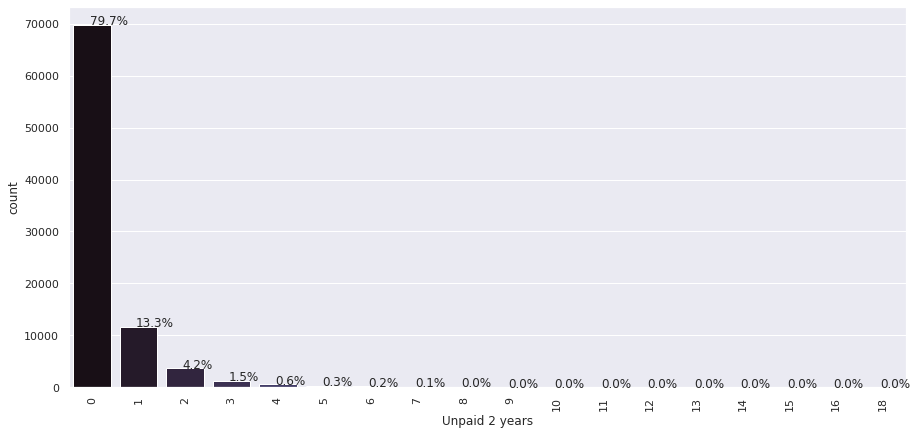

In [38]:
perc_on_bar(df_train['Unpaid 2 years'])

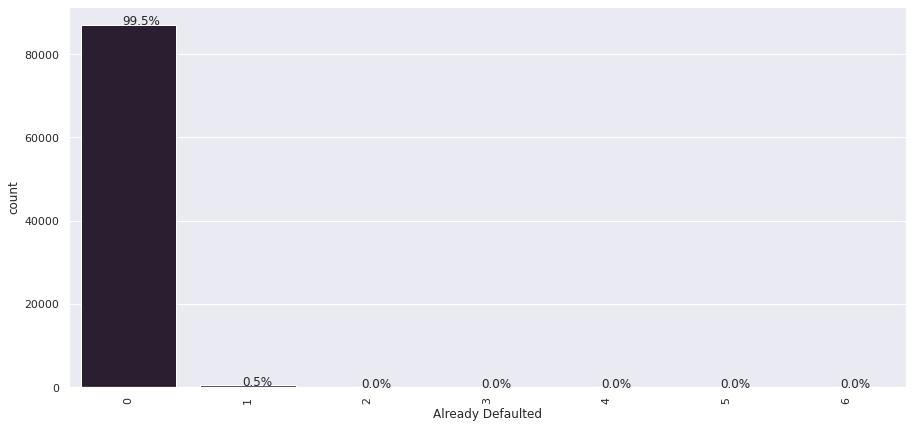

In [39]:
perc_on_bar(df_train['Already Defaulted'])

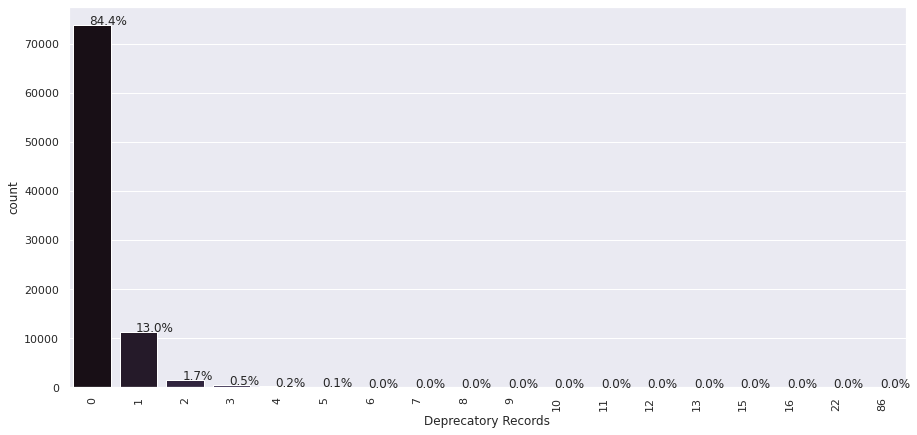

In [40]:
perc_on_bar(df_train['Deprecatory Records'])

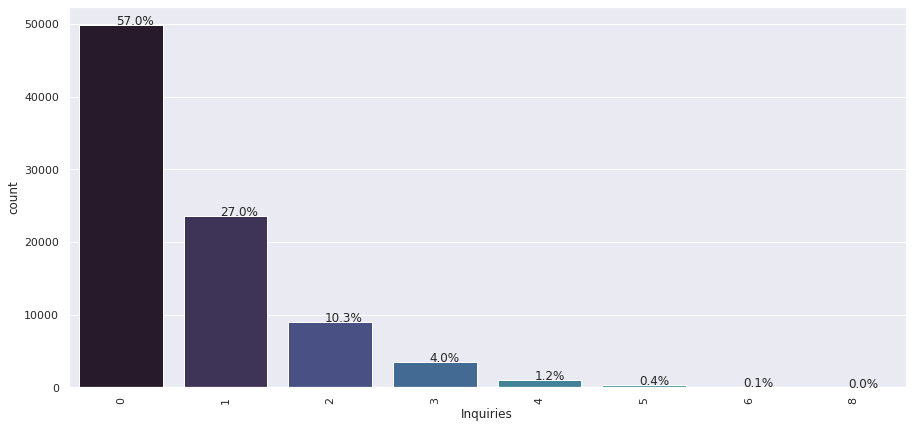

In [41]:
perc_on_bar(df_train['Inquiries'])

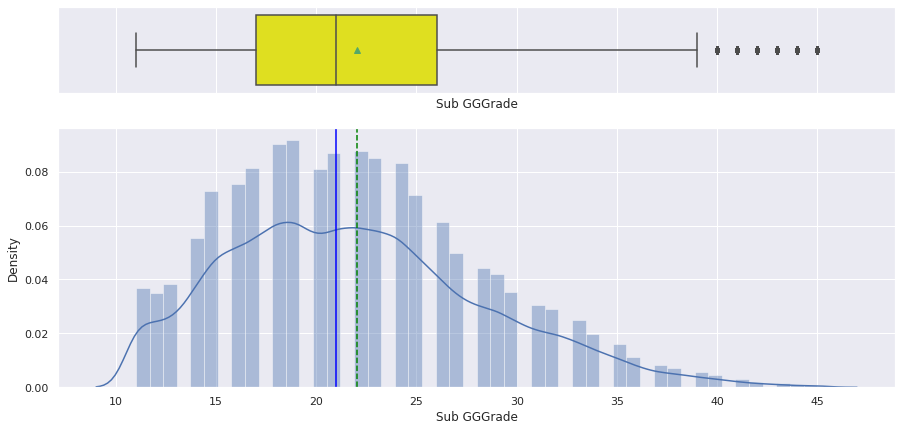

In [42]:
histogram_boxplot(df_train['Sub GGGrade'])

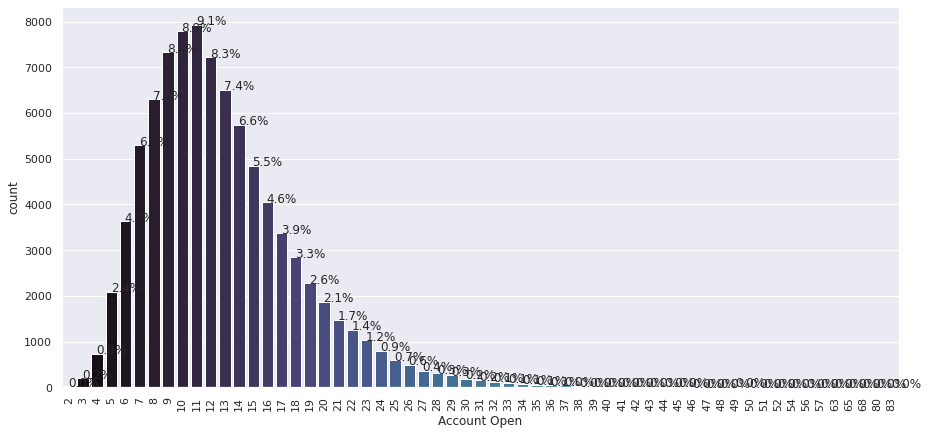

In [43]:
perc_on_bar(df_train['Account Open'])

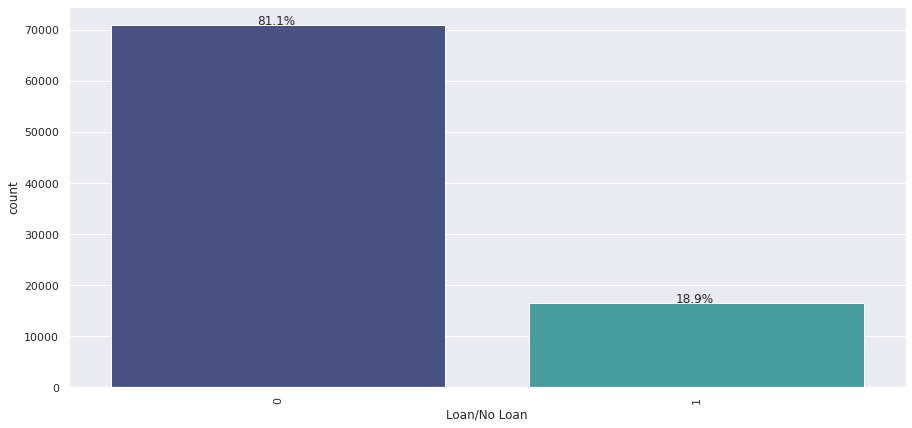

In [44]:
perc_on_bar(df_train['Loan/No Loan'])

In [45]:
df_train.select_dtypes(include='float').columns

Index(['Yearly Income', 'Debt to Income', 'Postal Code', 'Lend Amount',
       'Interest Charged', 'Usage Rate', 'Present Balance', 'Gross Collection',
       'Total Unpaid CL', 'Unpaid Amount', 'Due Fee'],
      dtype='object')

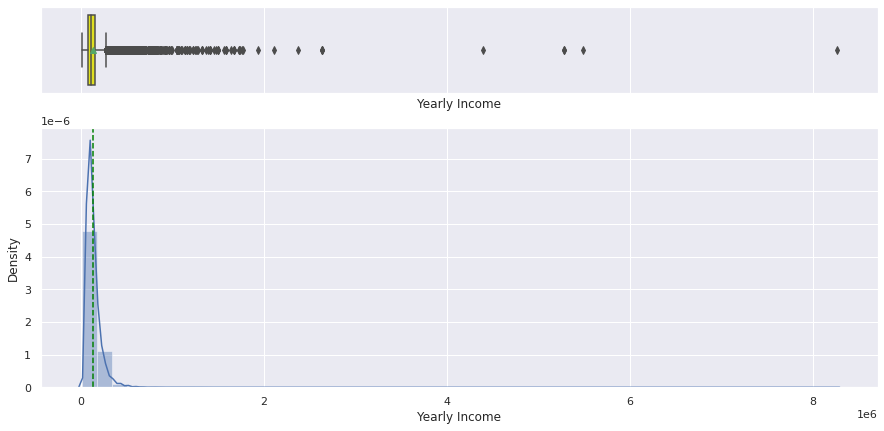

In [46]:
histogram_boxplot(df_train['Yearly Income'])

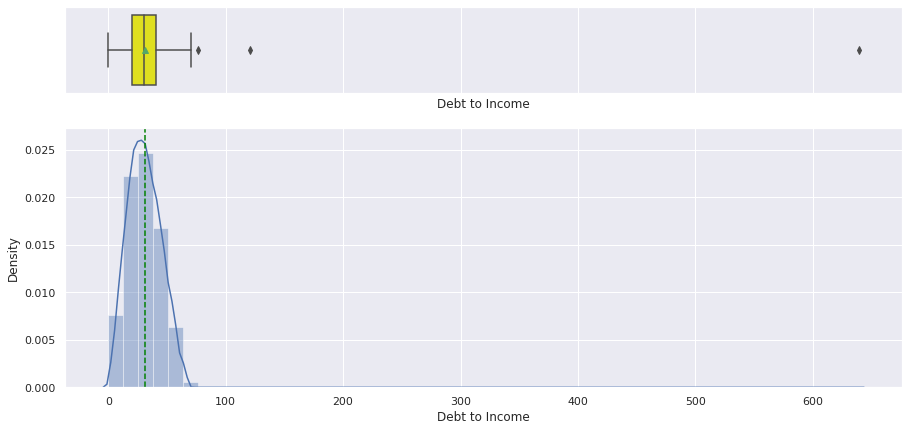

In [47]:
histogram_boxplot(df_train['Debt to Income'])

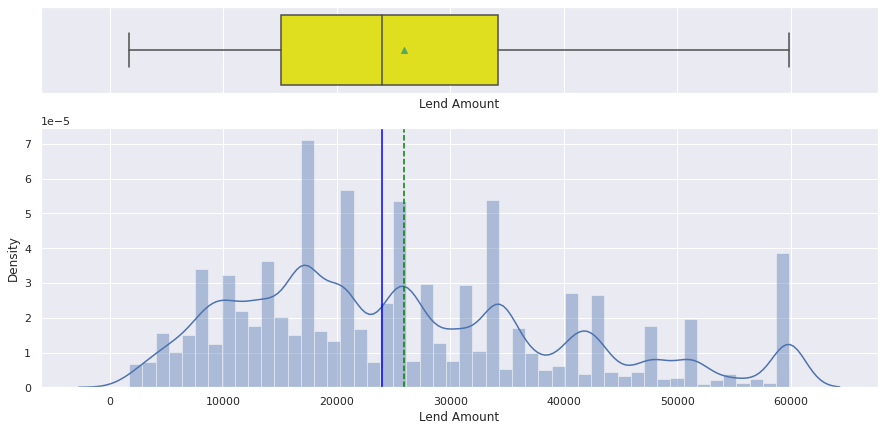

In [48]:
histogram_boxplot(df_train['Lend Amount'])

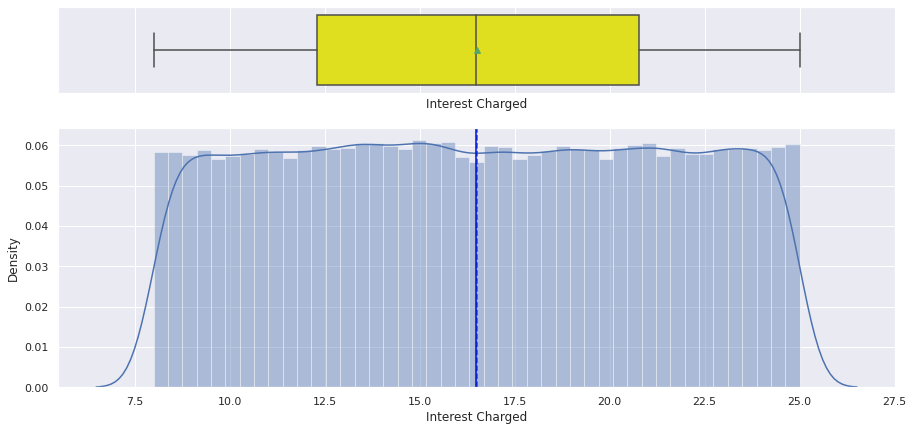

In [49]:
histogram_boxplot(df_train['Interest Charged'])

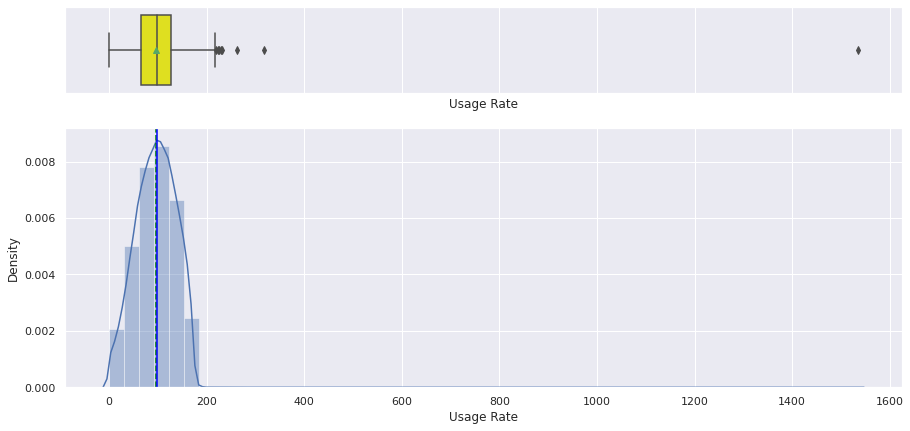

In [50]:
histogram_boxplot(df_train['Usage Rate'])

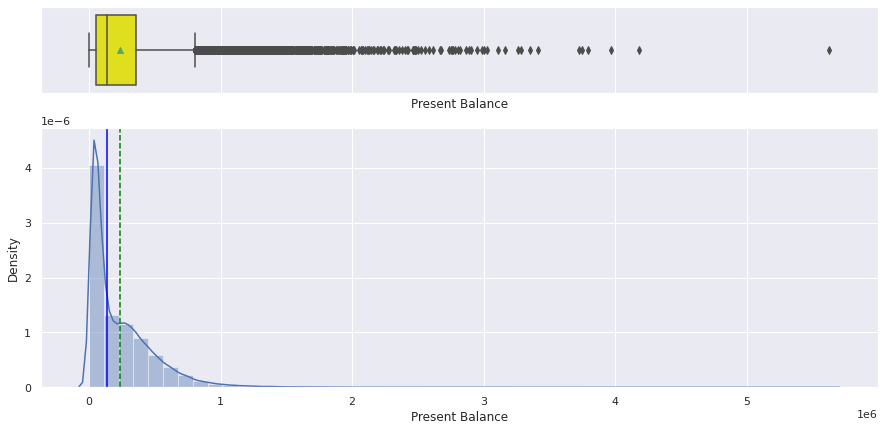

In [51]:
histogram_boxplot(df_train['Present Balance'])

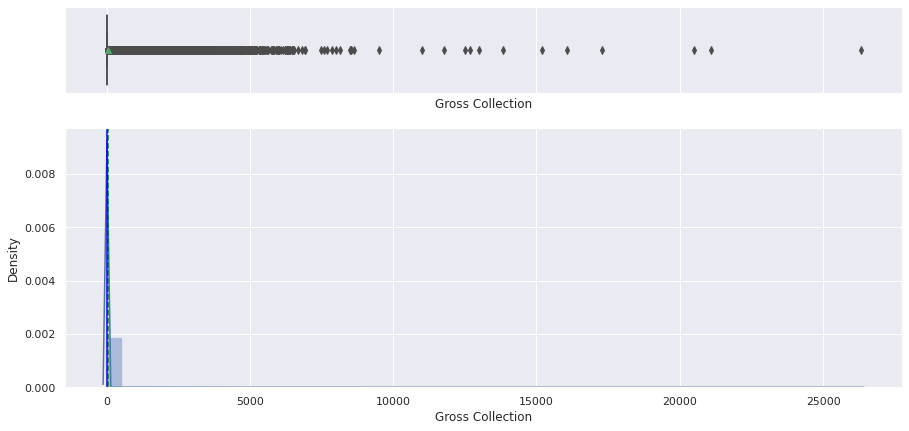

In [52]:
histogram_boxplot(df_train['Gross Collection'])

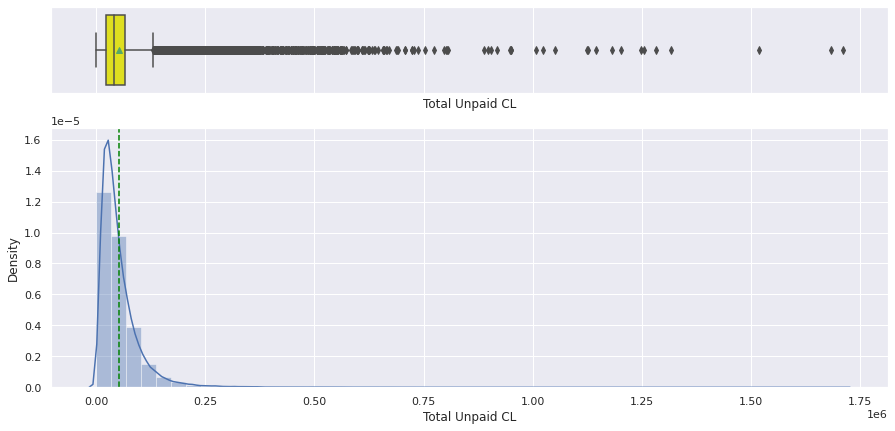

In [53]:
histogram_boxplot(df_train['Total Unpaid CL'])

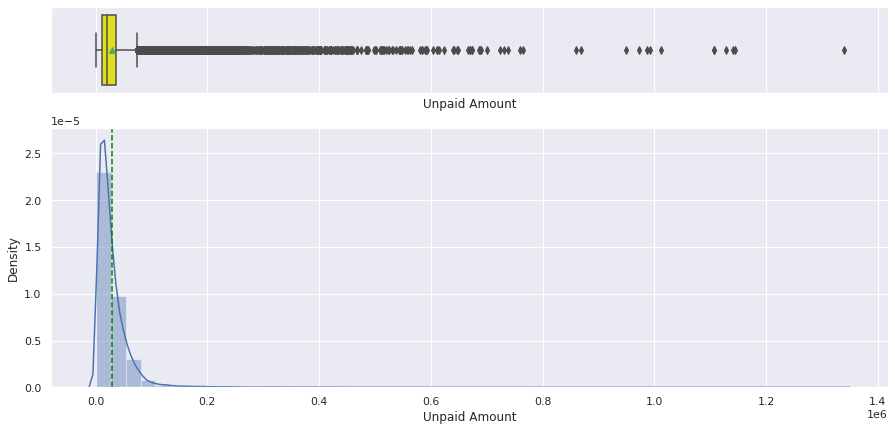

In [54]:
histogram_boxplot(df_train['Unpaid Amount'])

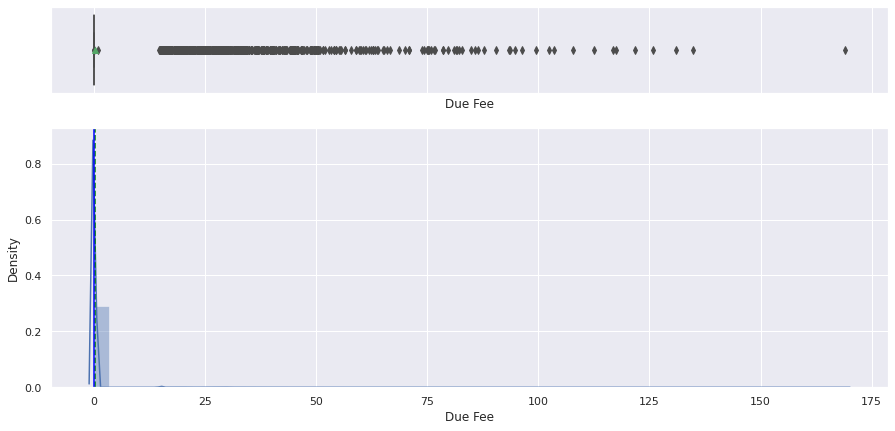

In [55]:
histogram_boxplot(df_train['Due Fee'])

In [56]:
df_train.select_dtypes(include='category').columns

Index(['GGGrade', 'Experience', 'Validation', 'Home Status', 'Designation',
       'File Status', 'State', 'Duration', 'Reason', 'Claim Type'],
      dtype='object')

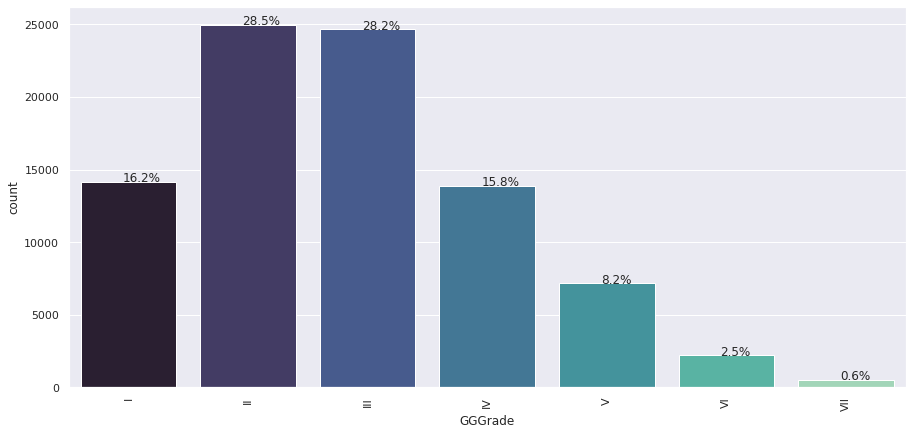

In [57]:
perc_on_bar(df_train['GGGrade'])

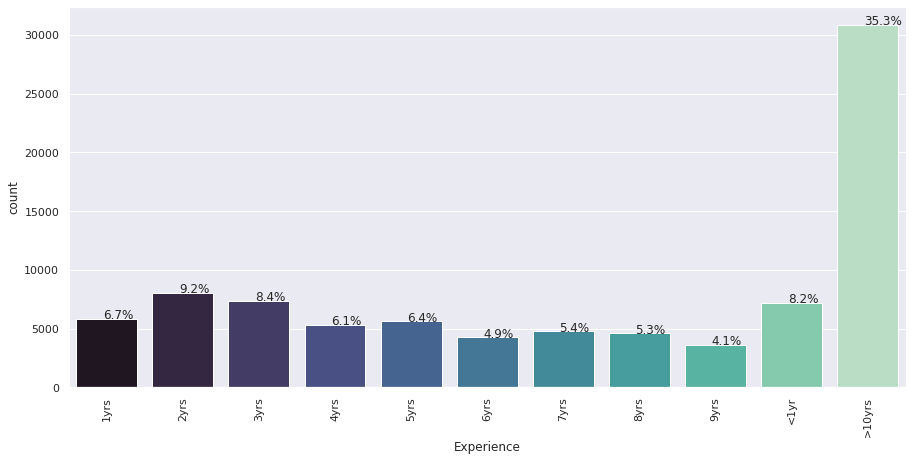

In [58]:
perc_on_bar(df_train['Experience'])

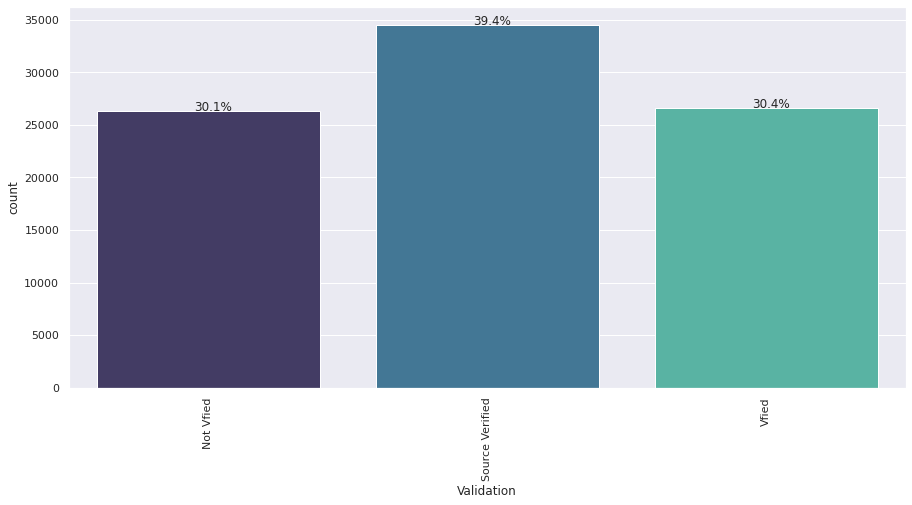

In [59]:
perc_on_bar(df_train['Validation'])

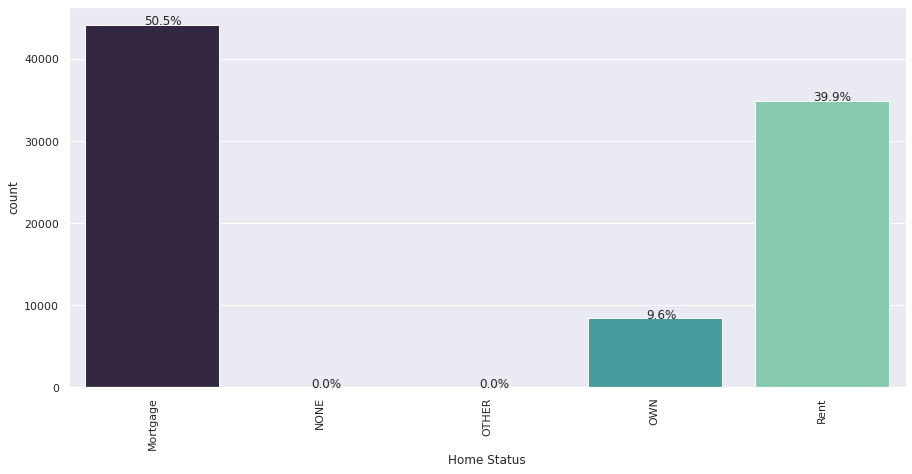

In [60]:
perc_on_bar(df_train['Home Status'])

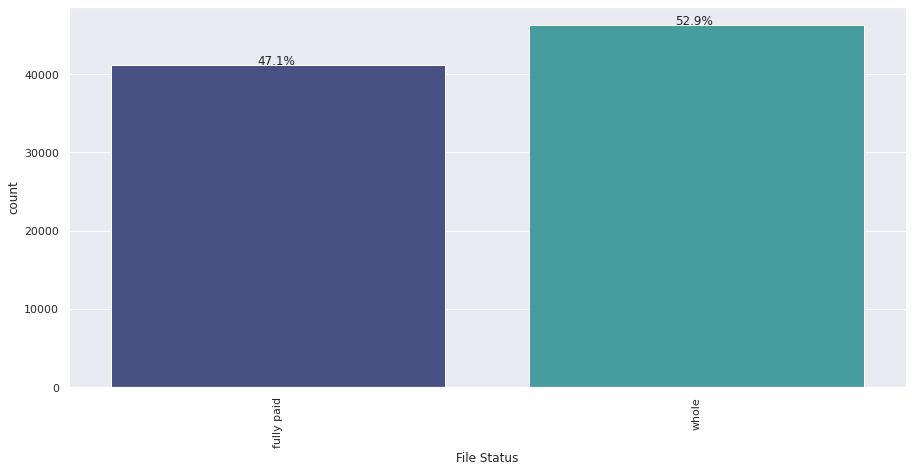

In [61]:
perc_on_bar(df_train['File Status'])

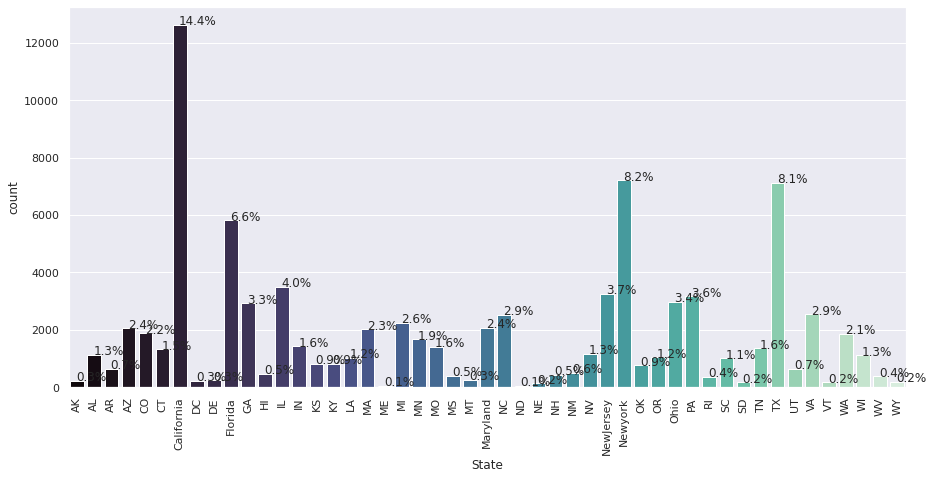

In [62]:
perc_on_bar(df_train['State'])

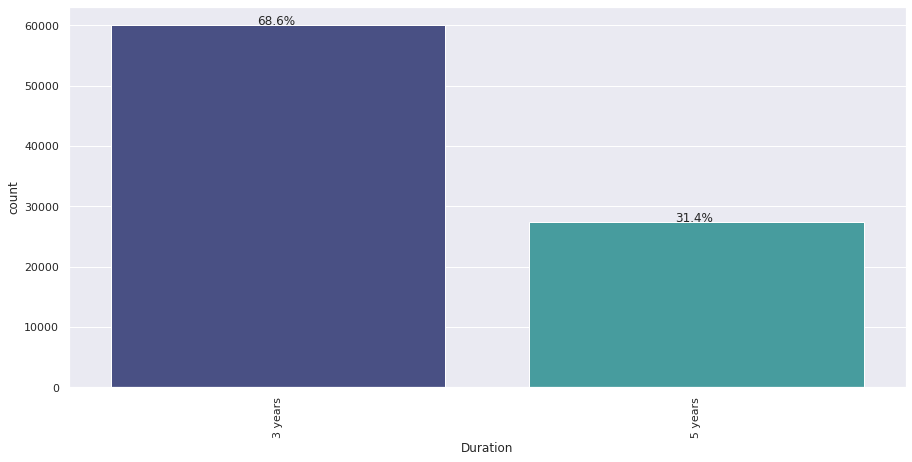

In [63]:
perc_on_bar(df_train['Duration'])

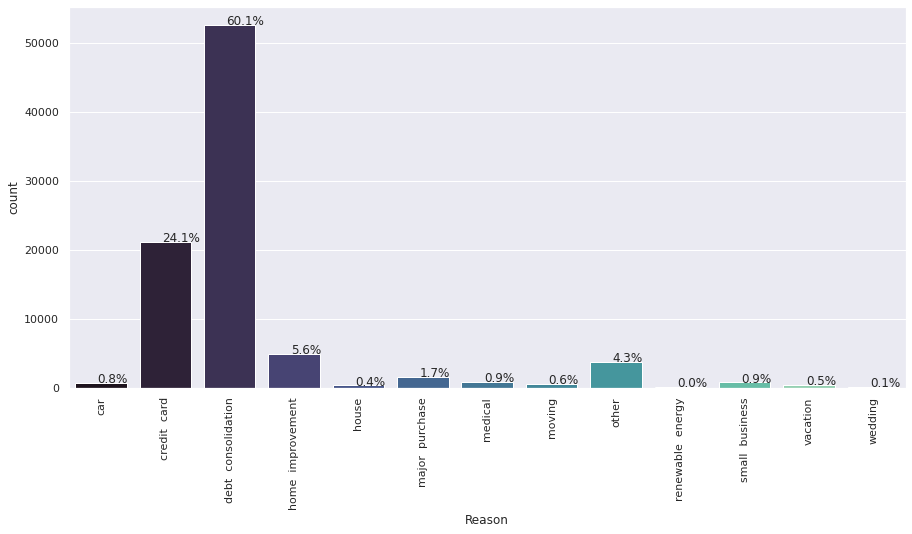

In [64]:
perc_on_bar(df_train['Reason'])

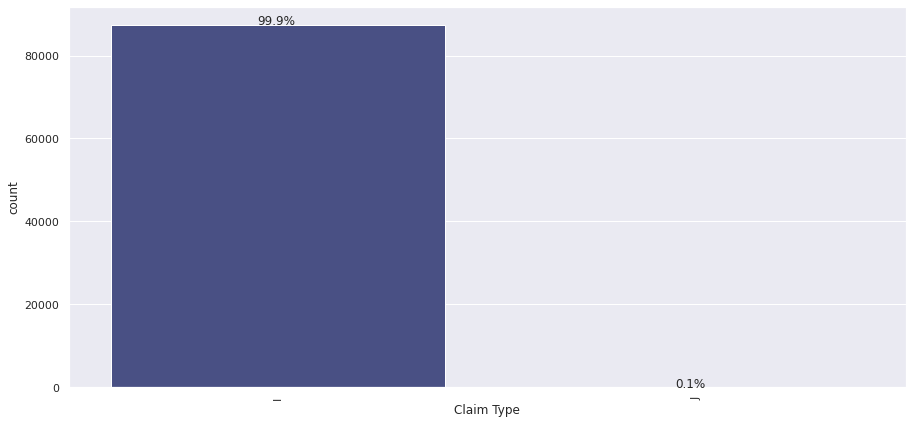

In [65]:
perc_on_bar(df_train['Claim Type'])

### **Bivariate Analysis**

In [66]:
## Function to plot stacked bar chart
def stacked_plot(x, y, show_df=True):
    """
    Shows stacked plot from x and y pandas data series
    x: pandas data series
    y: pandas data series
    show_df: flag to show dataframe above plot (default=True)
    """
    if show_df == True:
        info = pd.crosstab(x, y, margins=True)
        info['% - 0'] = round(info[0]/info['All']*100, 2)
        info['% - 1'] = round(info[1]/info['All']*100, 2)
        display(info)
        
    pd.crosstab(x, y, normalize='index').plot(kind='bar', stacked=True, figsize=(10,5));

In [67]:
def show_boxplots(cols: list, feature: str, show_fliers=True, data=df_train): #method call to show bloxplots
    """
    Shows boxplots from pandas data series
    cols: list of column names
    feature: dataframe categorical feature
    """
    n_rows = math.ceil(len(cols)/3)
    plt.figure(figsize=(15, n_rows*5))
    for i, variable in enumerate(cols):
        plt.subplot(n_rows, 3, i+1)
        if show_fliers:
            sns.boxplot(df_train[feature], data[variable], palette="mako", showfliers=True) 
        else:
            sns.boxplot(df_train[feature], data[variable], palette="mako", showfliers=False)
        plt.tight_layout()
        plt.title(variable, fontsize=12)
    plt.show()

In [68]:
### Function to plot distributions and Boxplots of customers
def plot_target(x, target='Loan/No Loan'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title('Distribution of Loan')
    sns.distplot(df_train[(df_train[target] == 1)][x], ax=axs[0,0], color='teal')
    axs[0, 1].set_title('Distribution of No Loan')
    sns.distplot(df_train[(df_train[target] == 0)][x],ax=axs[0,1], color='orange')
    axs[1,0].set_title('Boxplot w.r.t Loan-flag')
    sns.boxplot(df_train[target],df_train[x],ax=axs[1,0], palette='mako')
    axs[1,1].set_title('Boxplot w.r.t Loan-flag - Without outliers')
    sns.boxplot(df_train[target],df_train[x], ax=axs[1,1], showfliers=False, palette='mako')
    plt.tight_layout()
    plt.show()

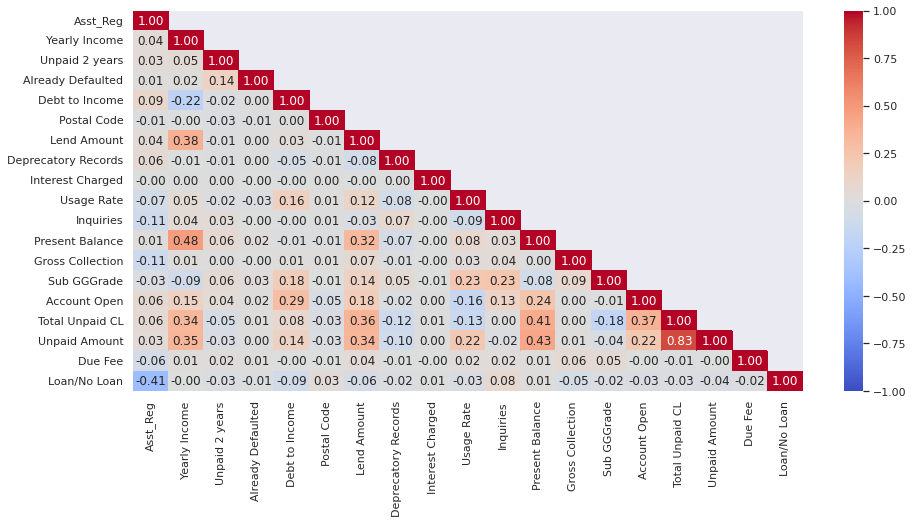

In [69]:
plt.figure(figsize=(15,7))
sns.heatmap(df_train.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='coolwarm',
            mask=np.triu(df_train.corr(),+1));

In [70]:
# Please remove hashtag from the below code before running
#sns.pairplot(data=df_train, hue='Loan/No Loan',palette='husl',plot_kws={'alpha': 0.5},corner=True);

Loan/No Loan      0      1    All  % - 0  % - 1
Duration                                       
3 years       47111  12950  60061  78.44  21.56
5 years       23877   3562  27439  87.02  12.98
All           70988  16512  87500  81.13  18.87

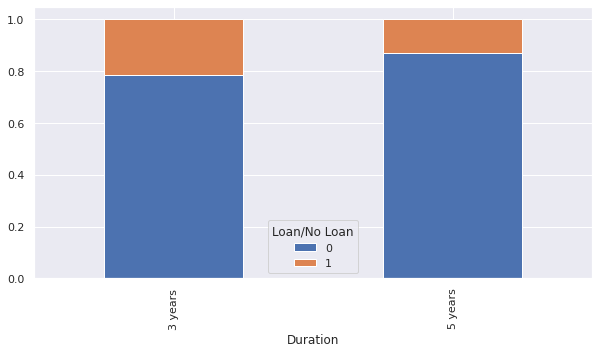

In [71]:
stacked_plot(df_train.Duration, df_train['Loan/No Loan'])

Loan/No Loan      0      1    All  % - 0  % - 1
GGGrade                                        
I             11508   2663  14171  81.21  18.79
II            19761   5205  24966  79.15  20.85
III           20226   4426  24652  82.05  17.95
IV            11263   2604  13867  81.22  18.78
V              6023   1131   7154  84.19  15.81
VI             1808    384   2192  82.48  17.52
VII             399     99    498  80.12  19.88
All           70988  16512  87500  81.13  18.87

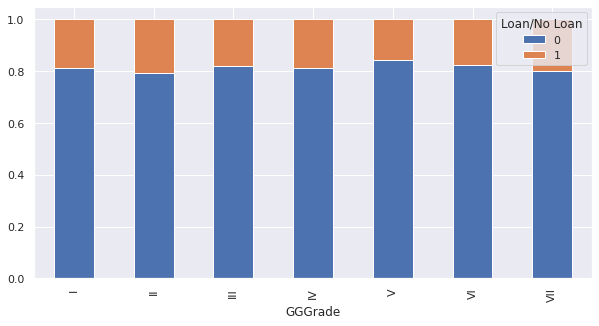

In [72]:
stacked_plot(df_train.GGGrade, df_train['Loan/No Loan'])

Loan/No Loan      0      1    All  % - 0  % - 1
Sub GGGrade                                    
11             1814    378   2192  82.76  17.24
12             1694    393   2087  81.17  18.83
13             1816    455   2271  79.96  20.04
14             2632    658   3290  80.00  20.00
15             3552    779   4331  82.01  17.99
16             3594    902   4496  79.94  20.06
17             3807   1038   4845  78.58  21.42
18             4176   1187   5363  77.87  22.13
19             4289   1165   5454  78.64  21.36
20             3895    913   4808  81.01  18.99
21             4216    958   5174  81.48  18.52
22             4236    979   5215  81.23  18.77
23             4207    856   5063  83.09  16.91
24             4130    827   4957  83.32  16.68
25             3437    806   4243  81.00  19.00
26             2999    655   3654  82.07  17.93
27             2355    606   2961  79.53  20.47
28             2136    492   2628  81.28  18.72
29             2047    464   2511  81.52  18.48
30             1726    387   2113  81.68  18.32
31             1555    263   1818  85.53  14.47
32             1459    268   1727  84.48  15.52
33             1237    240   1477  83.75  16.25
34              981    195   1176  83.42  16.58
35              791    165    956  82.74  17.26
36              562    116    678  82.89  17.11
37              401     81    482  83.20  16.80
38              353     84    437  80.78  19.22
39              261     67    328  79.57  20.43
40              231     36    267  86.52  13.48
41              144     33    177  81.36  18.64
42               96     25    121  79.34  20.66
43               72     19     91  79.12  20.88
44               37     14     51  72.55  27.45
45               50      8     58  86.21  13.79
All           70988  16512  87500  81.13  18.87

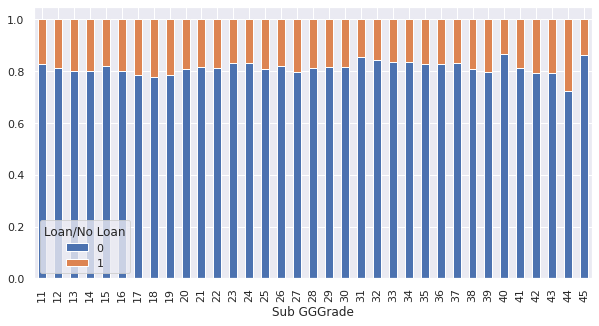

In [73]:
stacked_plot(df_train['Sub GGGrade'], df_train['Loan/No Loan'])

Loan/No Loan      0      1    All  % - 0  % - 1
Experience                                     
1yrs           4803   1050   5853  82.06  17.94
2yrs           6509   1555   8064  80.72  19.28
3yrs           6009   1341   7350  81.76  18.24
4yrs           4344    980   5324  81.59  18.41
5yrs           4524   1099   5623  80.46  19.54
6yrs           3286    969   4255  77.23  22.77
7yrs           3708   1054   4762  77.87  22.13
8yrs           3748    856   4604  81.41  18.59
9yrs           2885    722   3607  79.98  20.02
<1yr           5940   1269   7209  82.40  17.60
>10yrs        25232   5617  30849  81.79  18.21
All           70988  16512  87500  81.13  18.87

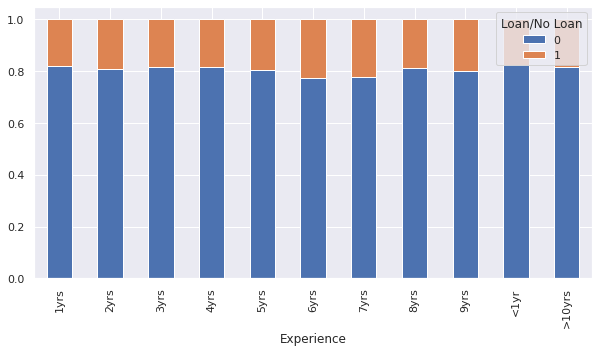

In [74]:
stacked_plot(df_train.Experience, df_train['Loan/No Loan'])

Loan/No Loan      0      1    All  % - 0   % - 1
Home Status                                     
Mortgage      35472   8688  44160  80.33   19.67
NONE              0      4      4   0.00  100.00
OTHER             2      4      6  33.33   66.67
OWN            6993   1423   8416  83.09   16.91
Rent          28521   6393  34914  81.69   18.31
All           70988  16512  87500  81.13   18.87

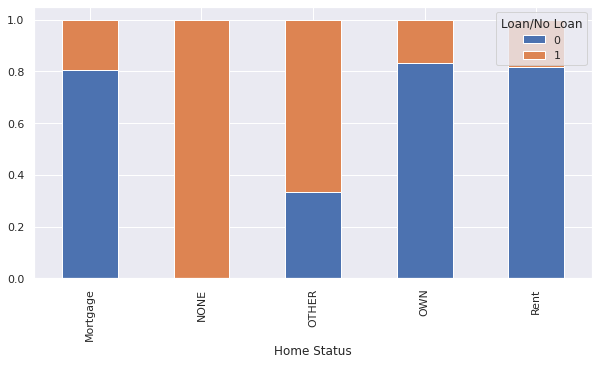

In [75]:
stacked_plot(df_train['Home Status'], df_train['Loan/No Loan'])

Loan/No Loan         0      1    All  % - 0  % - 1
Validation                                        
Not Vfied        20644   5710  26354  78.33  21.67
Source Verified  29470   5034  34504  85.41  14.59
Vfied            20874   5768  26642  78.35  21.65
All              70988  16512  87500  81.13  18.87

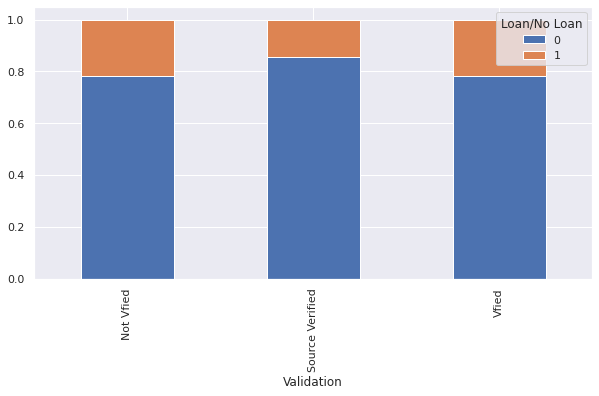

In [76]:
stacked_plot(df_train.Validation, df_train['Loan/No Loan'])

Loan/No Loan             0      1    All  % - 0  % - 1
Reason                                                
car                    550    160    710  77.46  22.54
credit  card         17477   3625  21102  82.82  17.18
debt  consolidation  42405  10154  52559  80.68  19.32
home  improvement     3926    960   4886  80.35  19.65
house                  215     96    311  69.13  30.87
major  purchase       1221    291   1512  80.75  19.25
medical                660    161    821  80.39  19.61
moving                 408     95    503  81.11  18.89
other                 3102    672   3774  82.19  17.81
renewable  energy       24     14     38  63.16  36.84
small  business        606    145    751  80.69  19.31
vacation               350     74    424  82.55  17.45
wedding                 44     65    109  40.37  59.63
All                  70988  16512  87500  81.13  18.87

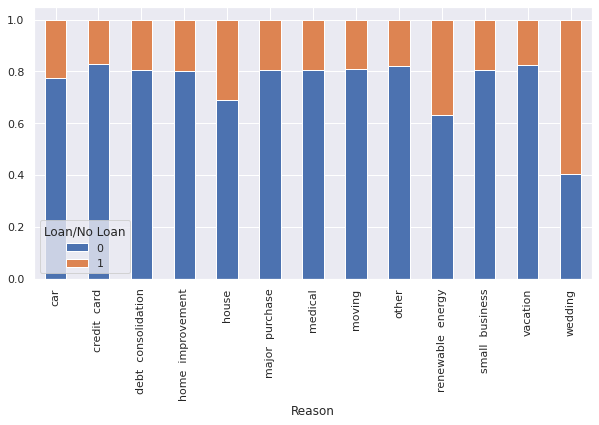

In [77]:
stacked_plot(df_train.Reason, df_train['Loan/No Loan'])

Loan/No Loan      0      1    All  % - 0  % - 1
State                                          
AK              177     44    221  80.09  19.91
AL              926    214   1140  81.23  18.77
AR              532    118    650  81.85  18.15
AZ             1644    414   2058  79.88  20.12
CO             1519    363   1882  80.71  19.29
CT             1115    210   1325  84.15  15.85
California     9871   2754  12625  78.19  21.81
DC              174     61    235  74.04  25.96
DE              201     37    238  84.45  15.55
Florida        4794   1019   5813  82.47  17.53
GA             2357    567   2924  80.61  19.39
HI              357    108    465  76.77  23.23
IL             2905    597   3502  82.95  17.05
IN             1202    231   1433  83.88  16.12
KS              664    155    819  81.07  18.93
KY              662    159    821  80.63  19.37
LA              833    186   1019  81.75  18.25
MA             1680    345   2025  82.96  17.04
ME               48      1     49  97.96   2.04
MI             1835    418   2253  81.45  18.55
MN             1350    323   1673  80.69  19.31
MO             1152    258   1410  81.70  18.30
MS              379     31    410  92.44   7.56
MT              205     54    259  79.15  20.85
Maryland       1658    415   2073  79.98  20.02
NC             2032    488   2520  80.63  19.37
ND               49      1     50  98.00   2.00
NE              128      6    134  95.52   4.48
NH              357     70    427  83.61  16.39
NM              411     86    497  82.70  17.30
NV              909    263   1172  77.56  22.44
NewJersey      2658    595   3253  81.71  18.29
Newyork        5910   1300   7210  81.97  18.03
OK              635    131    766  82.90  17.10
OR              793    257   1050  75.52  24.48
Ohio           2453    516   2969  82.62  17.38
PA             2633    536   3169  83.09  16.91
RI              303     69    372  81.45  18.55
SC              825    180   1005  82.09  17.91
SD              150     31    181  82.87  17.13
TN             1153    208   1361  84.72  15.28
TX             5812   1318   7130  81.51  18.49
UT              491    148    639  76.84  23.16
VA             2065    480   2545  81.14  18.86
VT              156     22    178  87.64  12.36
WA             1448    412   1860  77.85  22.15
WI              903    213   1116  80.91  19.09
WV              321     67    388  82.73  17.27
WY              153     33    186  82.26  17.74
All           70988  16512  87500  81.13  18.87

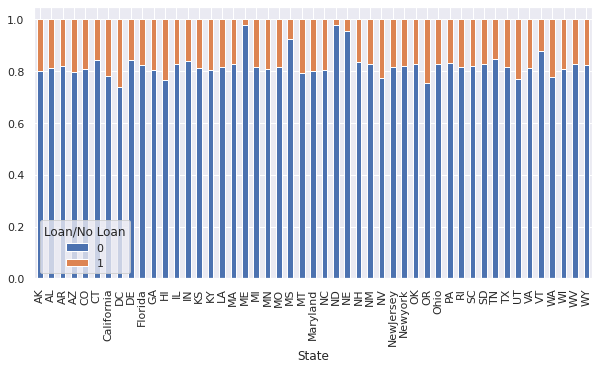

In [78]:
stacked_plot(df_train.State, df_train['Loan/No Loan'])

 With outliers 
 **************************************************


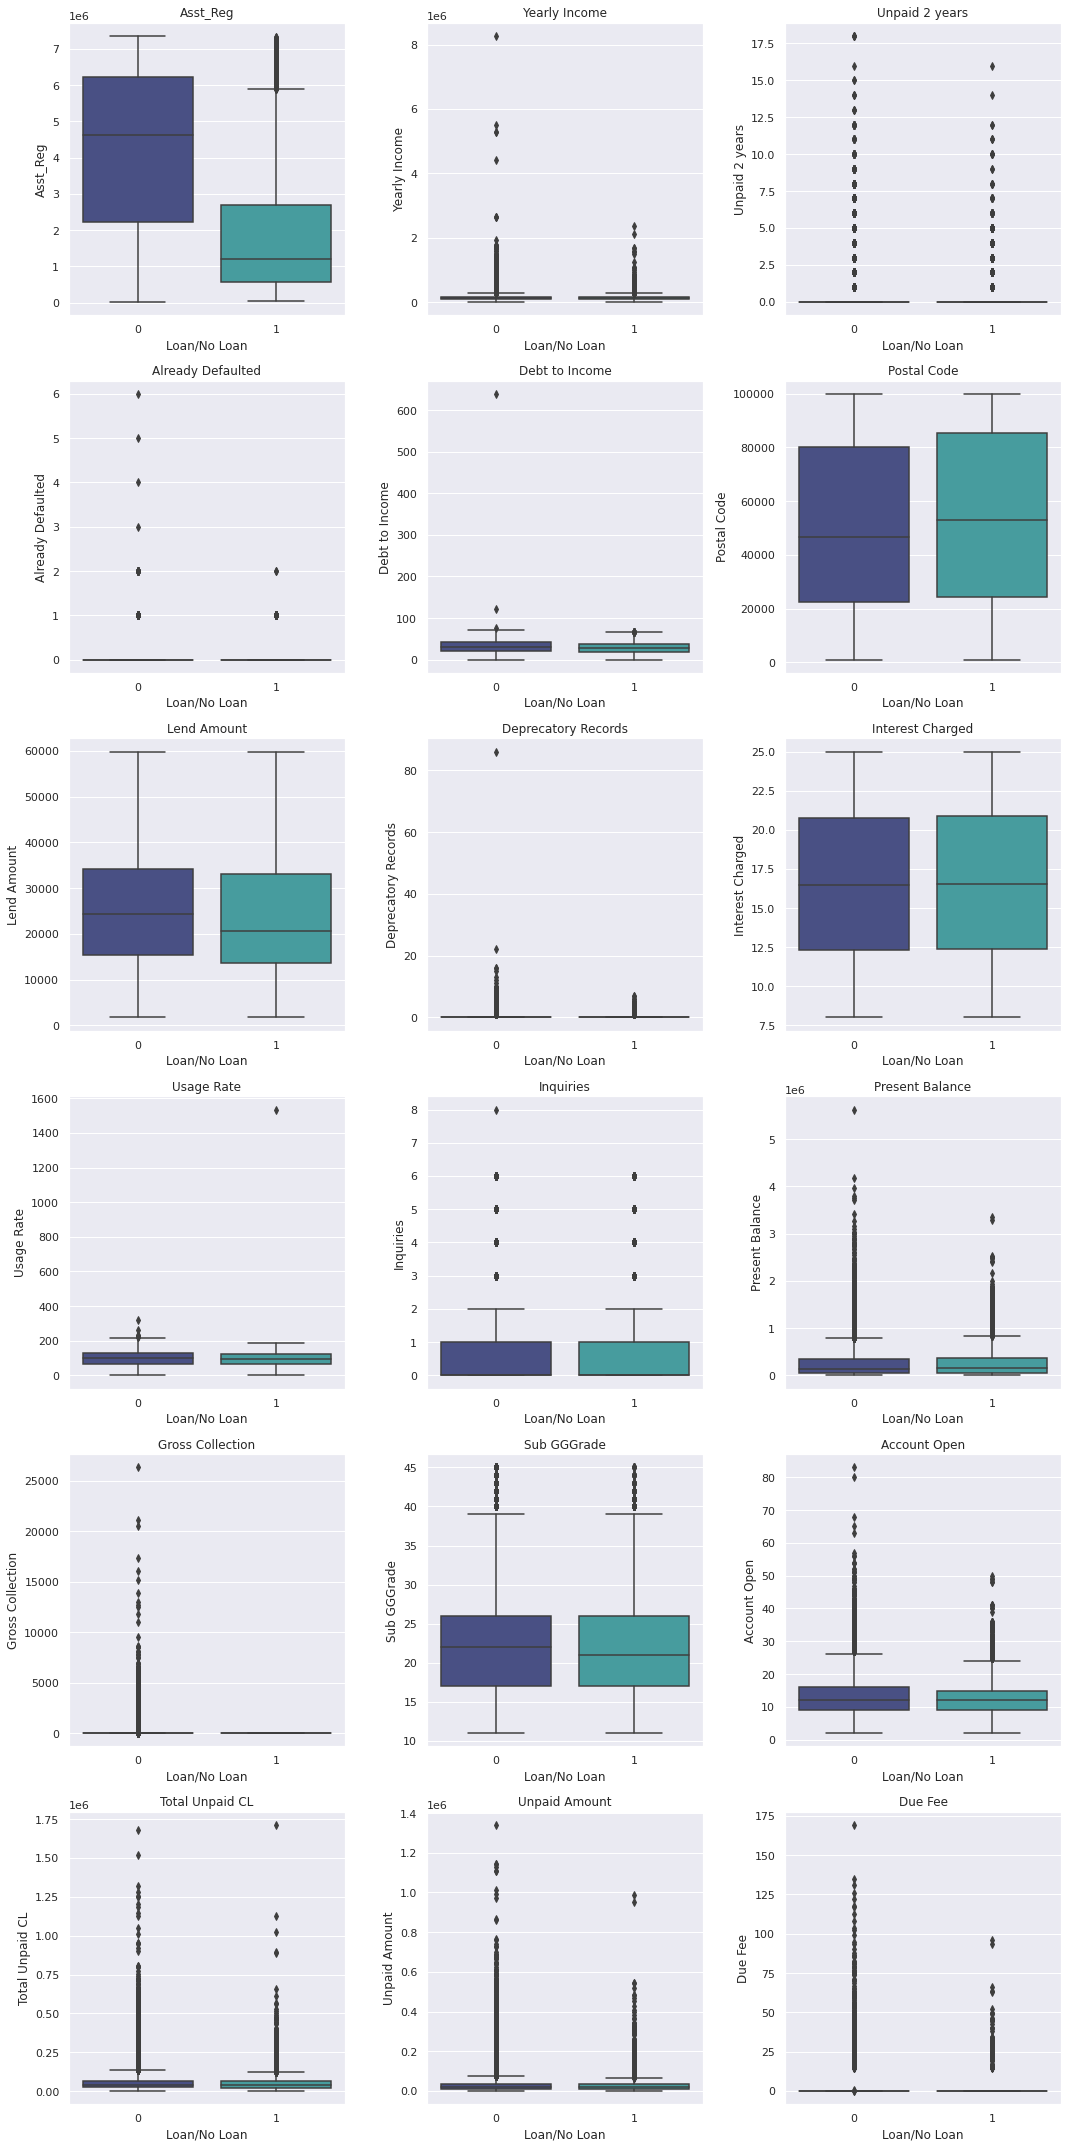

In [79]:
cols = df_train.select_dtypes(include=['integer', 'float']).columns.tolist()
cols.remove('Loan/No Loan')
print(' With outliers','\n','*'*50)
show_boxplots(cols=cols, feature='Loan/No Loan')

 Without outliers 
 **************************************************


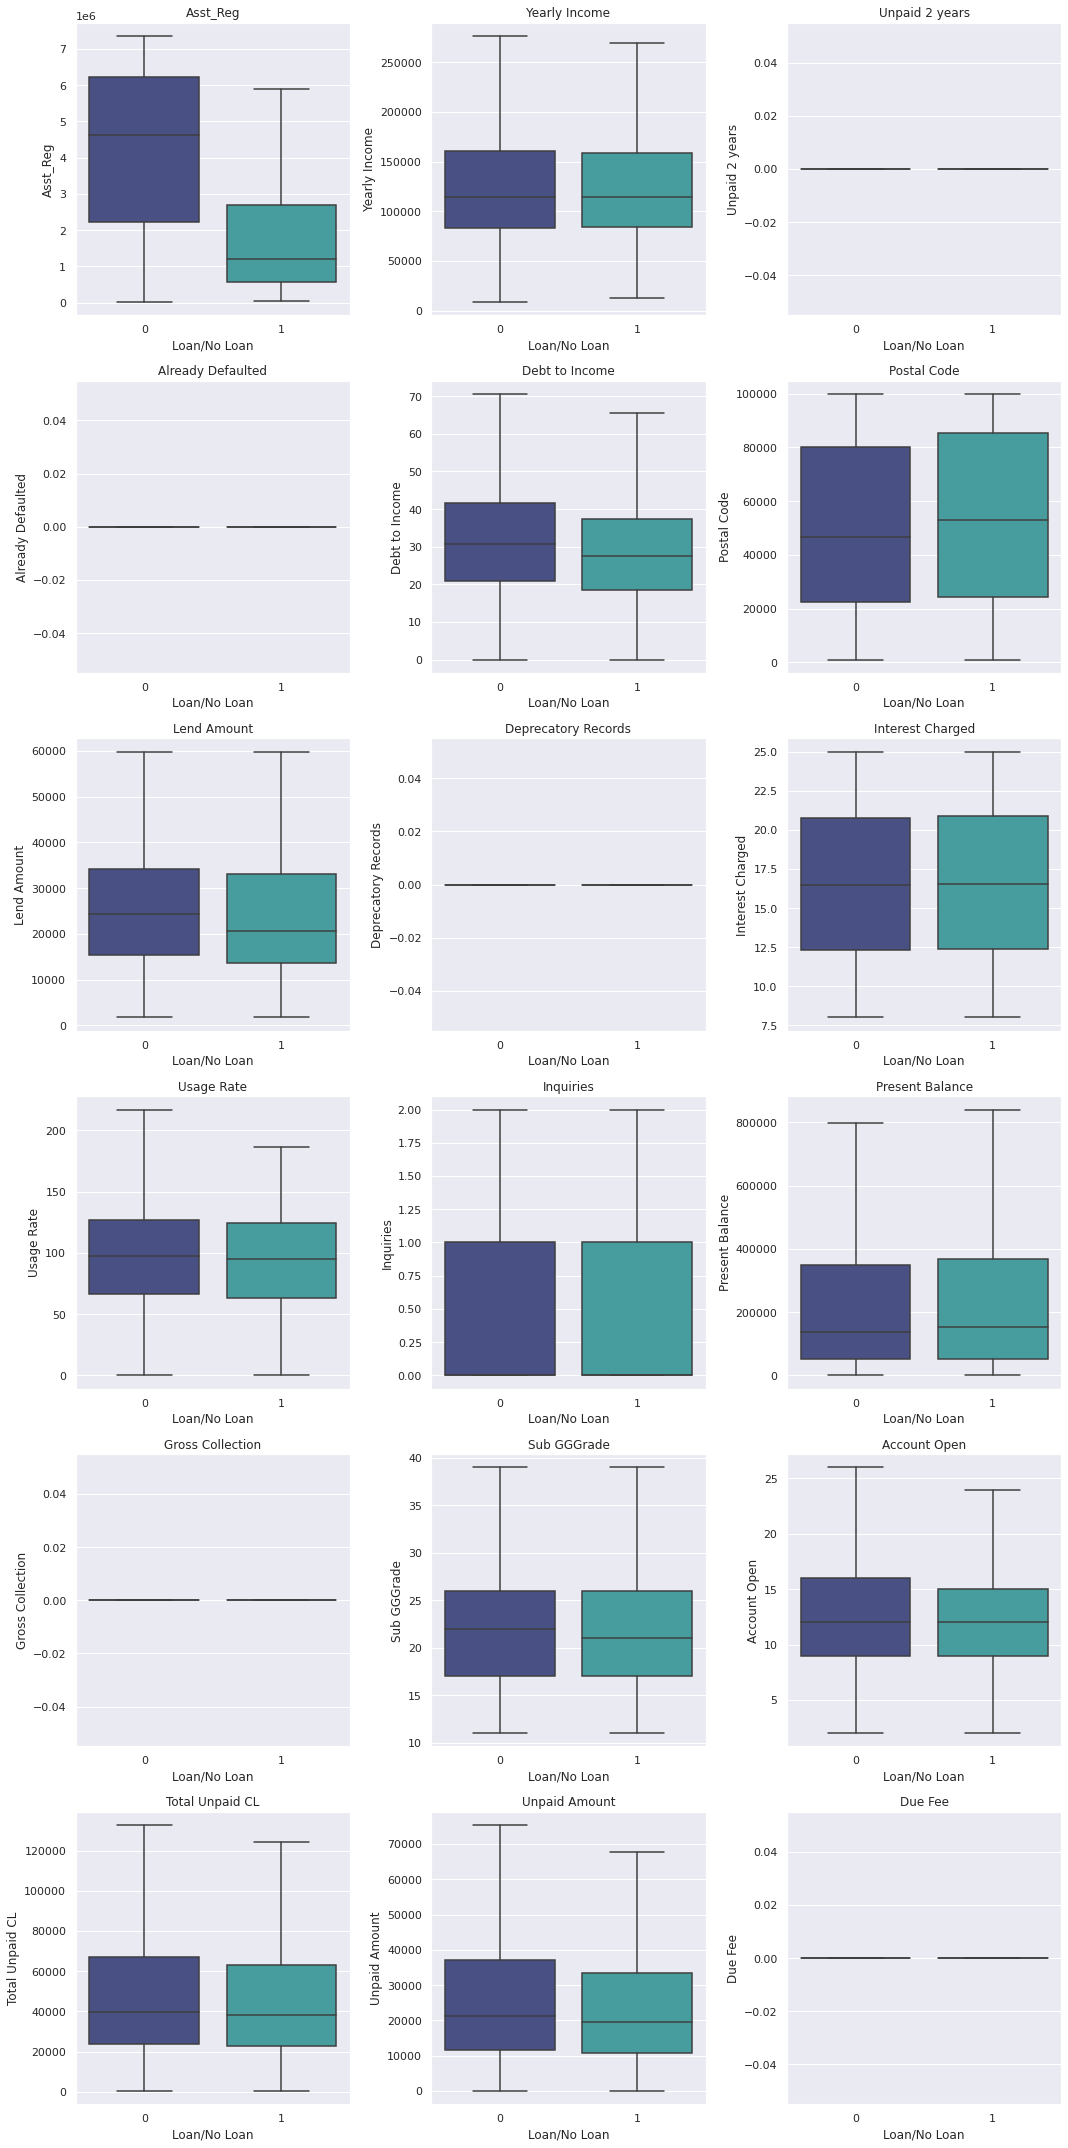

In [80]:
print(' Without outliers','\n','*'*50)
show_boxplots(cols=cols, feature='Loan/No Loan', show_fliers=False)

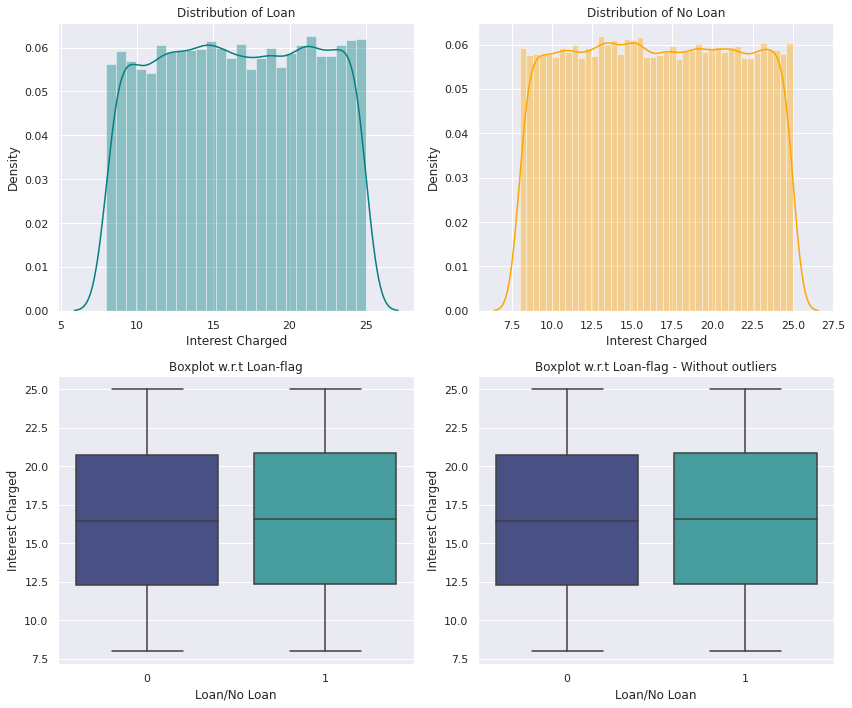

In [81]:
plot_target('Interest Charged')

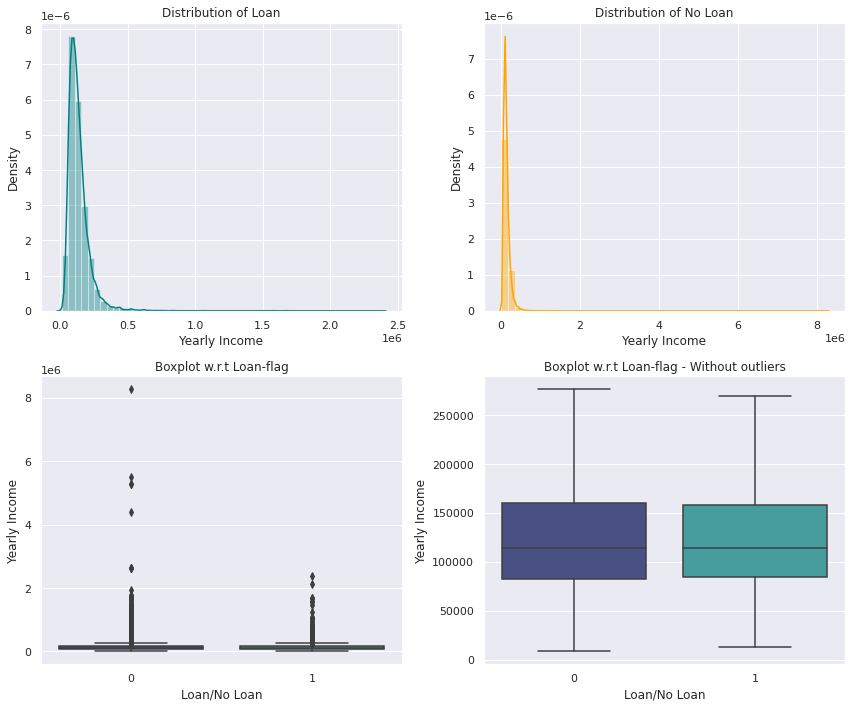

In [82]:
plot_target('Yearly Income')

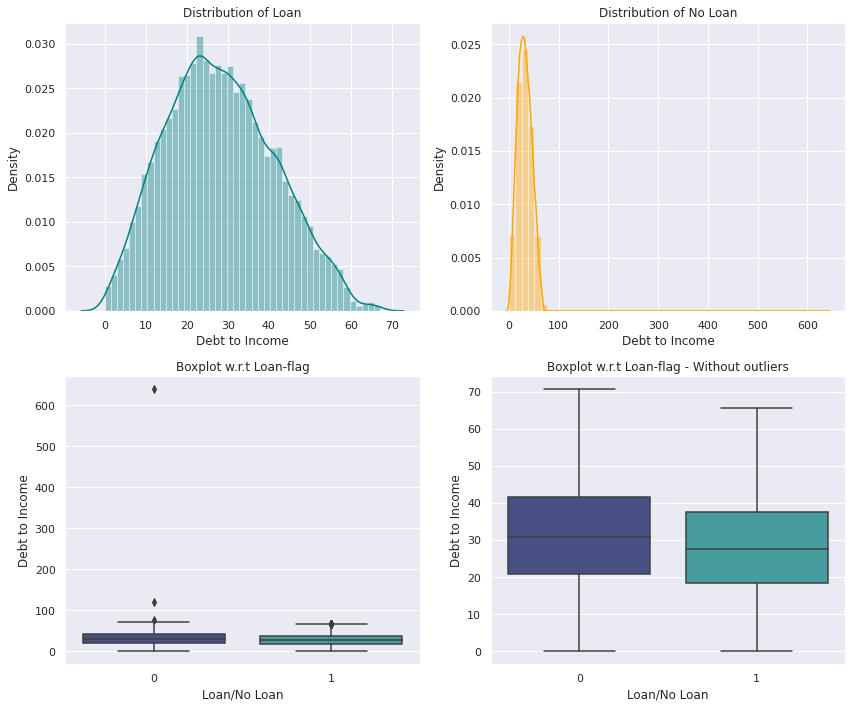

In [83]:
plot_target('Debt to Income')

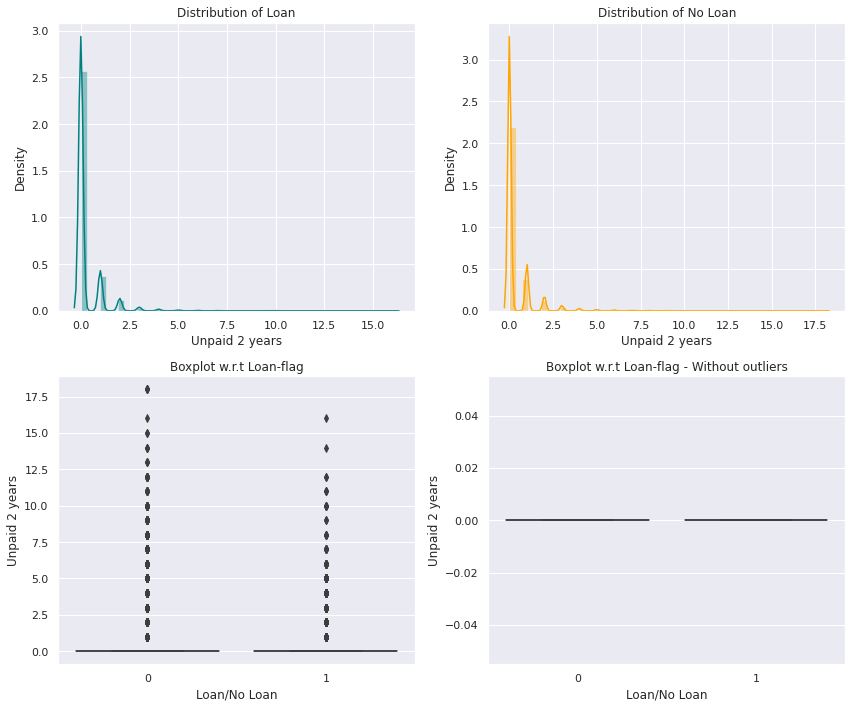

In [84]:
plot_target('Unpaid 2 years')

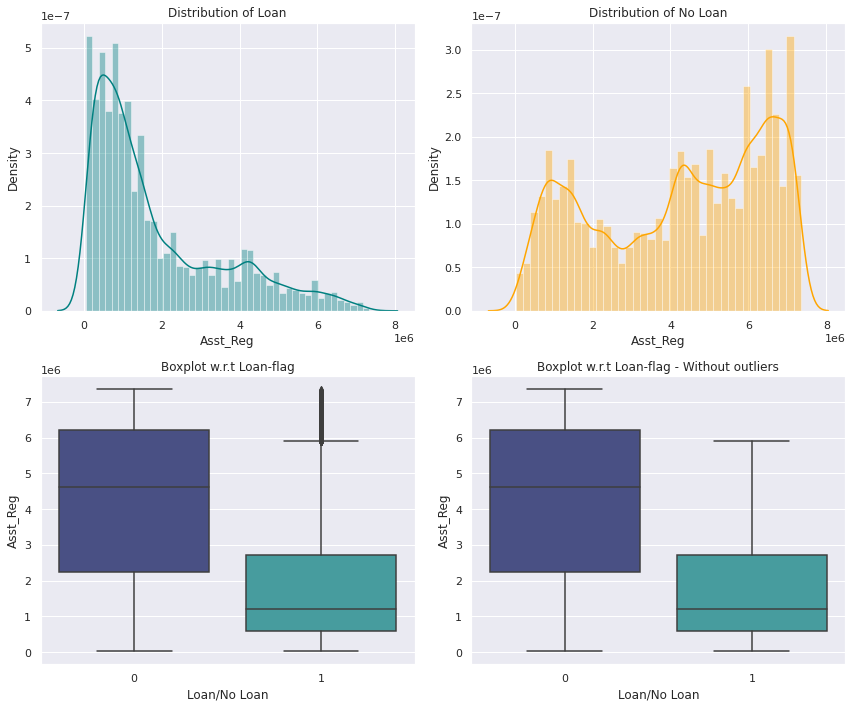

In [85]:
plot_target('Asst_Reg')

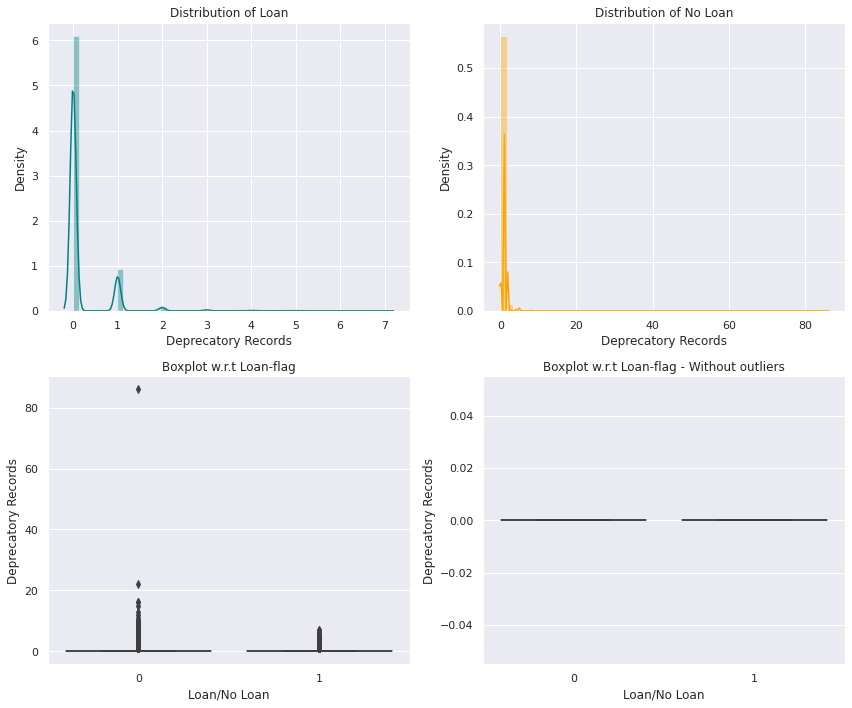

In [86]:
plot_target('Deprecatory Records')

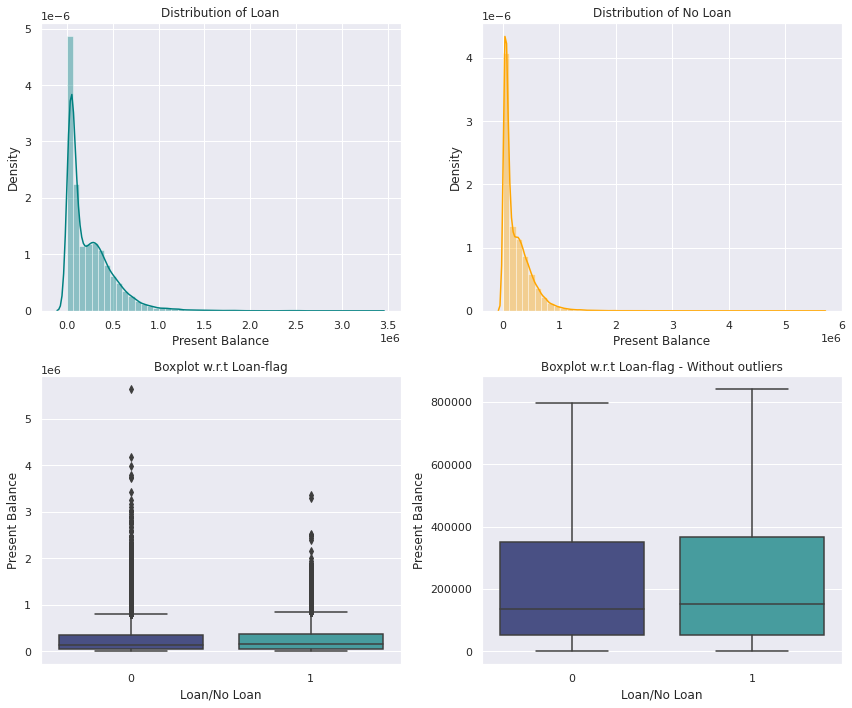

In [87]:
plot_target('Present Balance')

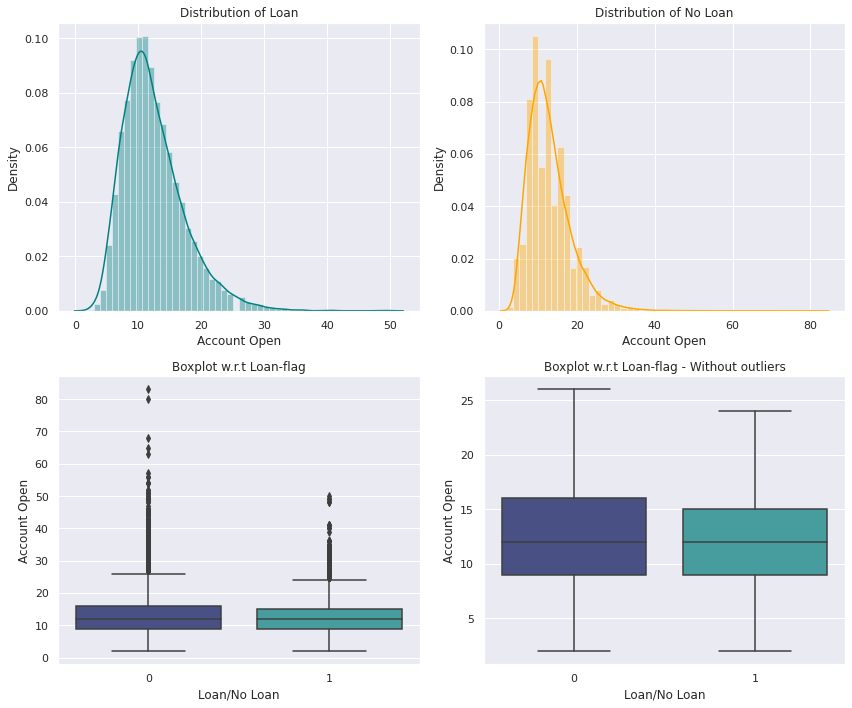

In [88]:
plot_target('Account Open')

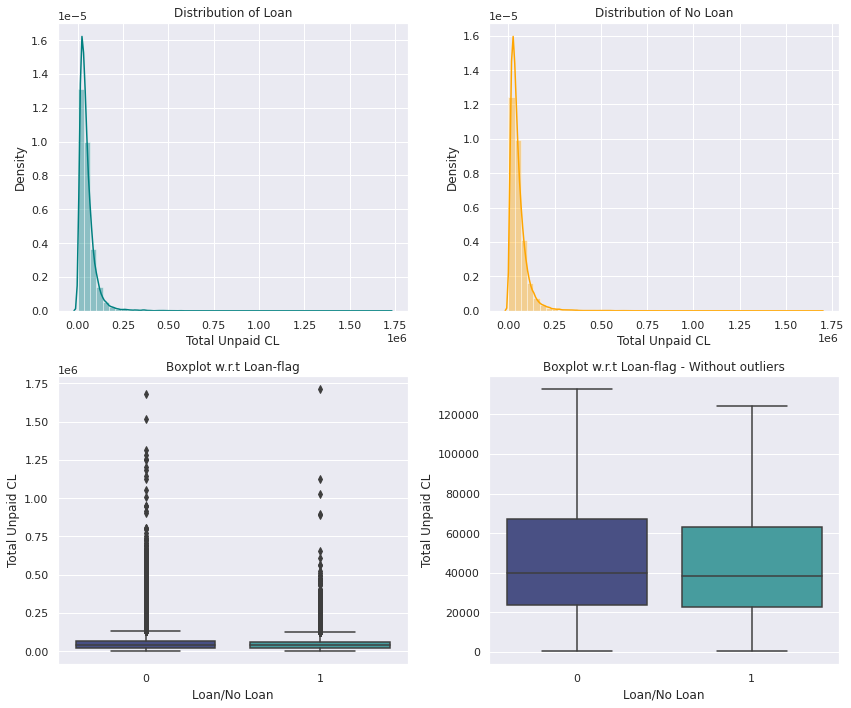

In [89]:
plot_target('Total Unpaid CL')

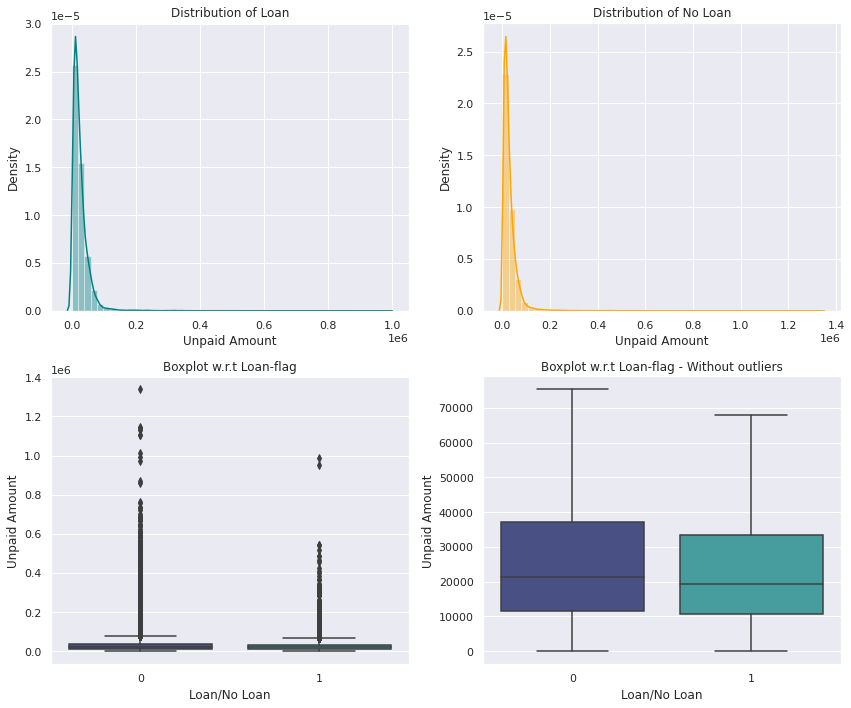

In [90]:
plot_target('Unpaid Amount')

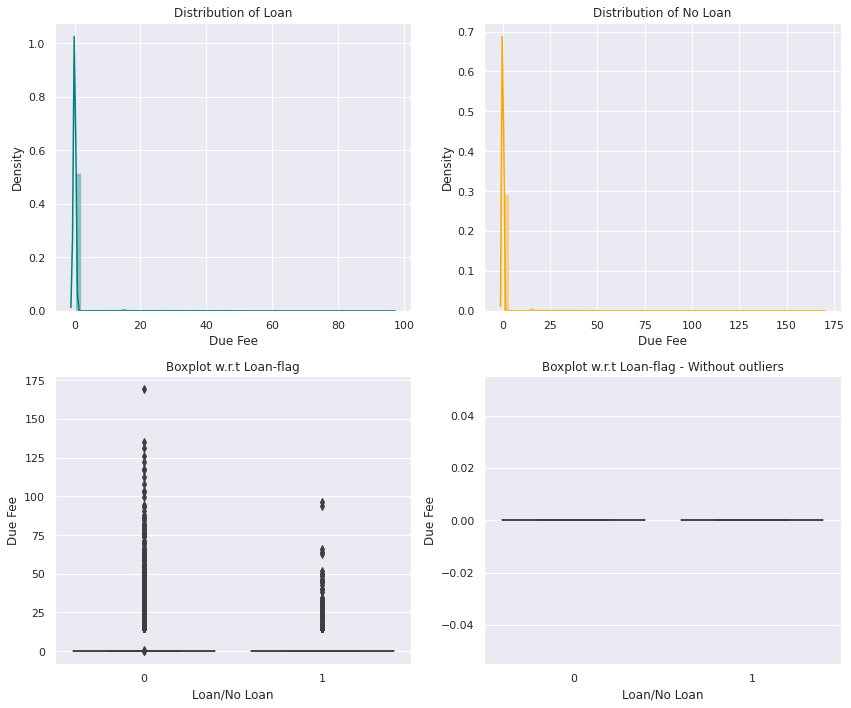

In [91]:
plot_target('Due Fee')

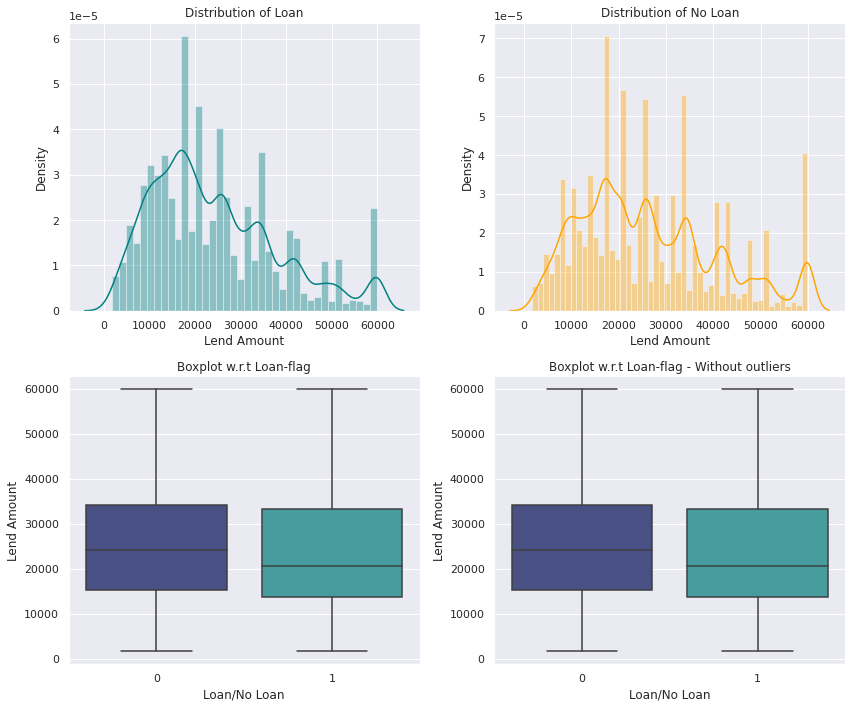

In [92]:
plot_target('Lend Amount')

In [93]:
def show_violinplot(cols: list, feature: str, hue=df_train['Loan/No Loan'], data=df_train, show_fliers=True):
    #plt.figure(figsize=(12,10))
    for i, variable in enumerate(cols):
        plt.subplot(2, 2, i+1)
        sns.violinplot(data[feature], 
                       data[variable],
                       hue=hue,
                       ci=0,
                       show_fliers=show_fliers)
        plt.tight_layout()
        plt.title(variable);

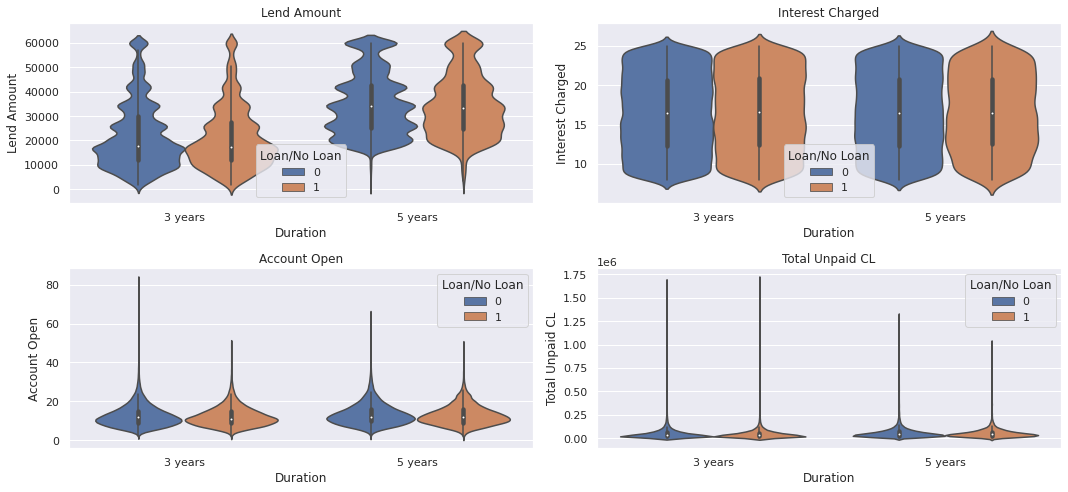

In [94]:
cols = ['Lend Amount', 'Interest Charged', 'Account Open', 'Total Unpaid CL']
show_violinplot(cols, 'Duration')

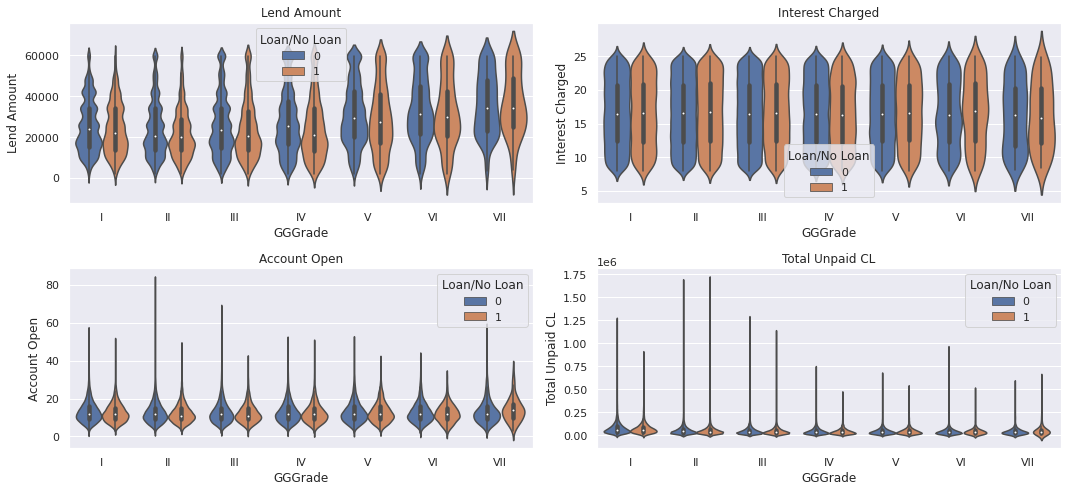

In [95]:
show_violinplot(cols, 'GGGrade', show_fliers=False)

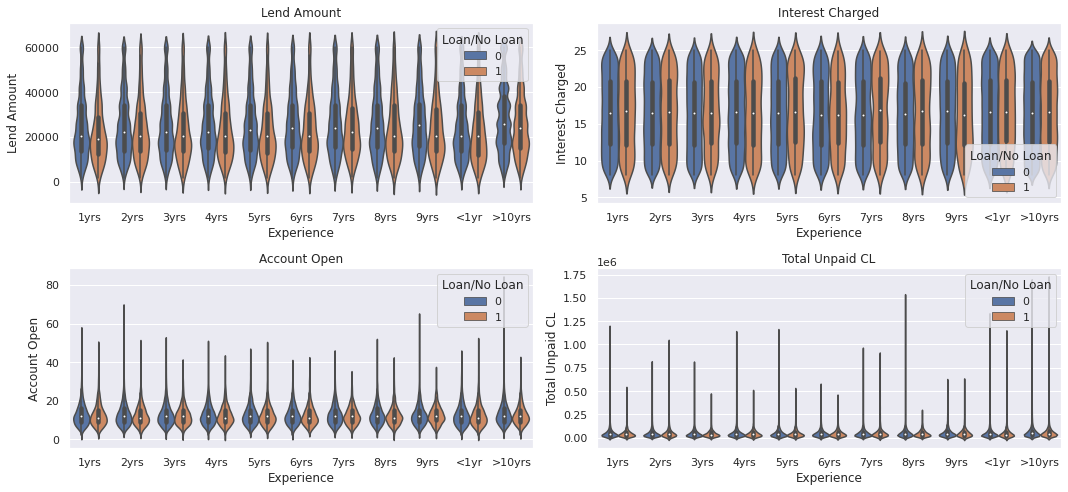

In [96]:
show_violinplot(cols, 'Experience', show_fliers=False)

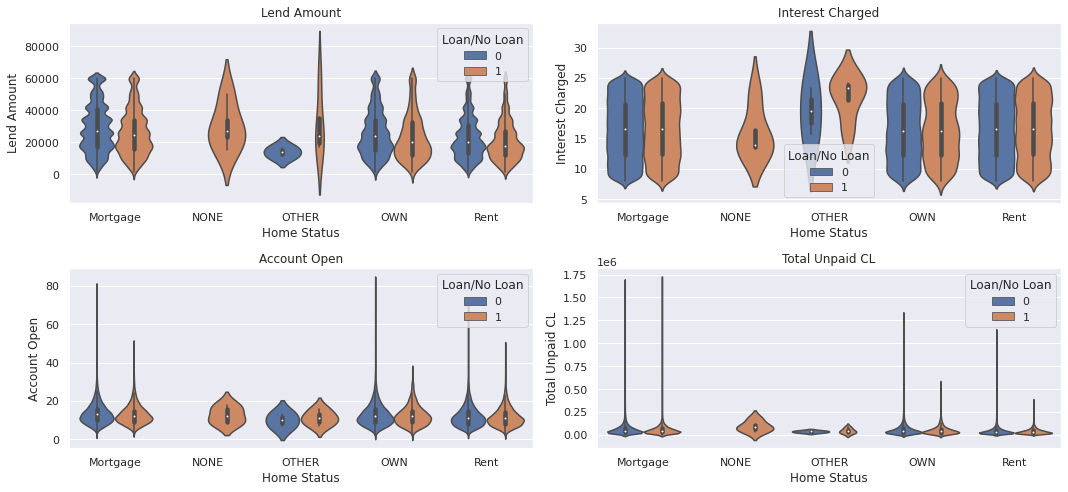

In [97]:
show_violinplot(cols, 'Home Status', show_fliers=False)

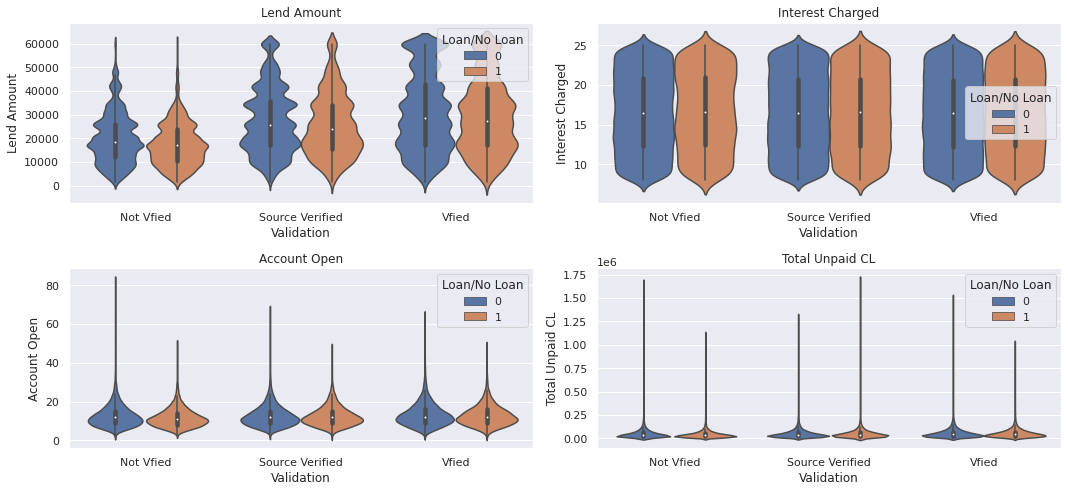

In [98]:
show_violinplot(cols, 'Validation', show_fliers=False)

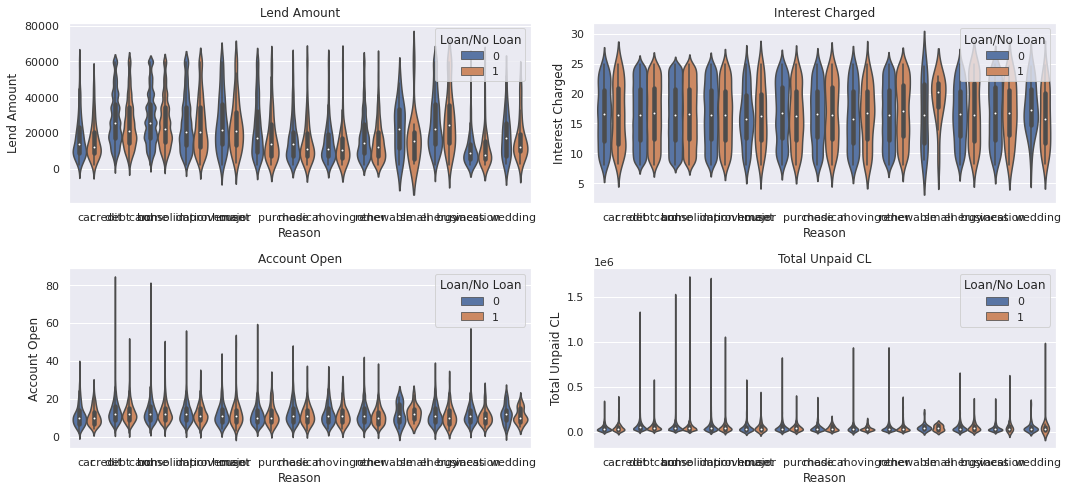

In [99]:
show_violinplot(cols, 'Reason', show_fliers=False)

In [100]:
Q1 = df_train.quantile(0.25) # To find the 25th percentile and 75th percentile.
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1            # Inter Quantile Range (75th perentile - 25th percentile)
lower = Q1-1.5 * IQR     # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3+1.5 * IQR
df_lower = (df_train.select_dtypes(include=['float64','int64']) < lower)
df_upper = (df_train.select_dtypes(include=['float64','int64']) > upper)
(df_lower | df_upper).sum()/len(df_train)*100

Asst_Reg                0.000000
Yearly Income           4.489143
Unpaid 2 years         20.266286
Already Defaulted       0.531429
Debt to Income          0.003429
Postal Code             0.000000
Lend Amount             0.000000
Deprecatory Records    15.626286
Interest Charged        0.000000
Usage Rate              0.009143
Inquiries               5.721143
Present Balance         3.258286
Gross Collection        1.925714
Sub GGGrade             0.874286
Account Open            2.091429
Total Unpaid CL         5.352000
Unpaid Amount           5.042286
Due Fee                 1.130286
Loan/No Loan           18.870857
dtype: float64

## Data Preparation

In [101]:
df_train.isna().sum()

Asst_Reg                  0
GGGrade                   0
Experience                0
Validation                0
Yearly Income          5575
Home Status               0
Unpaid 2 years            0
Already Defaulted         0
Designation            1414
Debt to Income         3489
Postal Code            1389
Lend Amount               0
Deprecatory Records       0
Interest Charged          0
Usage Rate                0
Inquiries                 0
Present Balance           0
Gross Collection          0
Sub GGGrade               0
File Status               0
State                     0
Account Open              0
Total Unpaid CL        4186
Duration                  0
Unpaid Amount          4852
Reason                    0
Claim Type                0
Due Fee                   0
Loan/No Loan              0
dtype: int64

In [102]:
df1 = df_train.copy()

In [103]:
for i in df1.select_dtypes(include=['category']).columns:
    print('Unique values in', i, 'are :')
    print(df1[i].value_counts(dropna=False))
    print('*'*50)

Unique values in GGGrade are :
II     24966
III    24652
I      14171
IV     13867
V       7154
VI      2192
VII      498
Name: GGGrade, dtype: int64
**************************************************
Unique values in Experience are :
>10yrs    30849
2yrs       8064
3yrs       7350
<1yr       7209
1yrs       5853
5yrs       5623
4yrs       5324
7yrs       4762
8yrs       4604
6yrs       4255
9yrs       3607
Name: Experience, dtype: int64
**************************************************
Unique values in Validation are :
Source Verified    34504
Vfied              26642
Not Vfied          26354
Name: Validation, dtype: int64
**************************************************
Unique values in Home Status are :
Mortgage    44160
Rent        34914
OWN          8416
OTHER           6
NONE            4
Name: Home Status, dtype: int64
**************************************************
Unique values in Designation are :
School Teacher                             1585
NaN                      

In [104]:
loan_grade = {'I':0, 'II':1, 'III':2, 'IV':3, 'V':4, 'VI':5, 'VII':6}
df1['GGGrade'] = df1['GGGrade'].map(loan_grade).astype('Int32')

In [105]:
df1.Validation.replace('Source Verified','Vfied', inplace=True)
df1.Validation.value_counts().sort_values(ascending=False)

Vfied        61146
Not Vfied    26354
Name: Validation, dtype: int64

In [106]:
verification = {'Vfied':0, 'Not Vfied':1}
df1['Validation'] = df1['Validation'].map(verification).astype('Int32')

In [107]:
df1['Home Status'].replace('NONE','OTHER', inplace=True)
df1['Home Status'].value_counts().sort_values(ascending=False)

Mortgage    44160
Rent        34914
OWN          8416
OTHER          10
Name: Home Status, dtype: int64

In [108]:
home_status = {'Mortgage':0, 'Rent':1, 'OWN':2, 'OTHER':3}
df1['Home Status'] = df1['Home Status'].map(home_status).astype('Int32')

In [109]:
df1.Designation.nunique()

40354

In [110]:
try:
    df1.drop(['Designation'], axis=1, inplace=True)
except:
    print("Designation column already dropped")
df1.columns

Index(['Asst_Reg', 'GGGrade', 'Experience', 'Validation', 'Yearly Income',
       'Home Status', 'Unpaid 2 years', 'Already Defaulted', 'Debt to Income',
       'Postal Code', 'Lend Amount', 'Deprecatory Records', 'Interest Charged',
       'Usage Rate', 'Inquiries', 'Present Balance', 'Gross Collection',
       'Sub GGGrade', 'File Status', 'State', 'Account Open',
       'Total Unpaid CL', 'Duration', 'Unpaid Amount', 'Reason', 'Claim Type',
       'Due Fee', 'Loan/No Loan'],
      dtype='object')

In [111]:
df1.State.nunique()

49

In [112]:
print(pd.Categorical(df1['State'].unique()))
print(pd.Categorical(df1['State'].unique()).codes)
df1['State']=pd.Categorical(df1['State']).codes

['California', 'NC', 'Florida', 'NewJersey', 'LA', ..., 'DE', 'ND', 'SD', 'WY', 'ME']
Length: 49
Categories (49, object): ['AK', 'AL', 'AR', 'AZ', ..., 'WA', 'WI', 'WV', 'WY']
[ 6 25  9 31 16 41  5 19 34  2 32 23  4 35 29 20 10 45 24  1 38 36  3 42
 17 43 12 46 30 11 37 40 33 44 13  0 21 27 28  7 47 22 15 14  8 26 39 48
 18]


In [113]:
claim_type = {'I': 0, 'J':1}
df1['Claim Type'] = df1['Claim Type'].map(claim_type).astype('Int32')

In [114]:
file_status = {'whole': 0, 'fully paid':1}
df1['File Status'] = df1['File Status'].map(file_status).astype('Int32')

In [115]:
duration = {'3 years': 0, '5 years': 1}
df1['Duration'] = df1['Duration'].map(duration).astype('Int32')

In [116]:
df1.Reason.value_counts()

debt  consolidation    52559
credit  card           21102
home  improvement       4886
other                   3774
major  purchase         1512
medical                  821
small  business          751
car                      710
moving                   503
vacation                 424
house                    311
wedding                  109
renewable  energy         38
Name: Reason, dtype: int64

In [117]:
print(pd.Categorical(df1['Reason'].unique()))
print(pd.Categorical(df1['Reason'].unique()).codes)
df1['Reason']=pd.Categorical(df1['Reason']).codes

['debt  consolidation', 'major  purchase', 'other', 'credit  card', 'car', ..., 'vacation', 'medical', 'wedding', 'house', 'renewable  energy']
Length: 13
Categories (13, object): ['car', 'credit  card', 'debt  consolidation',
                          'home  improvement', ..., 'renewable  energy', 'small  business', 'vacation',
                          'wedding']
[ 2  5  8  1  0  3 10  7 11  6 12  4  9]


In [118]:
df1.head()

Asst_Reg  GGGrade Experience  Validation  Yearly Income  Home Status  \
0    421802        1     >10yrs           0      633600.00            0   
1   3964312        3       7yrs           0       85483.20            1   
2   4247560        2       <1yr           0       79200.00            1   
3    197179        2       <1yr           0       61600.00            1   
4   4646684        4       2yrs           0       68053.92            1   

   Unpaid 2 years  Already Defaulted  Debt to Income  Postal Code  \
0               0                  0         12.5496      91300.0   
1               0                  0          9.0048      27400.0   
2               0                  0         24.9144      32800.0   
3               0                  0         16.5816       7000.0   
4               0                  0         40.0512      70800.0   

   Lend Amount  Deprecatory Records  Interest Charged  Usage Rate  Inquiries  \
0     42023.25                    0             15.39      88.924          3   
1     38133.00                    0              9.94     102.856          0   
2     17100.00                    0             22.35      60.372          0   
3      5130.00                    0             10.36     116.272          1   
4     19665.00                    0             13.68     127.280          1   

   Present Balance  Gross Collection  Sub GGGrade  File Status  State  \
0        607161.90               0.0           19            1      6   
1        269234.06               0.0           30            0     25   
2         22476.53               0.0           25            0      9   
3         15242.09               0.0           22            1     31   
4         65433.94               0.0           32            1     16   

   Account Open  Total Unpaid CL  Duration  Unpaid Amount  Reason  Claim Type  \
0            17          58598.0         0       31216.05       2           0   
1            15          18924.0         1       11660.49       2           0   
2             7          15604.0         1        5637.87       5           0   
3             9          22410.0         0       15607.17       5           0   
4            10          36022.0         1       27472.86       2           0   

   Due Fee  Loan/No Loan  
0      0.0             0  
1      0.0             0  
2      0.0             0  
3      0.0             1  
4      0.0             0

In [119]:
df1.Experience.value_counts()

>10yrs    30849
2yrs       8064
3yrs       7350
<1yr       7209
1yrs       5853
5yrs       5623
4yrs       5324
7yrs       4762
8yrs       4604
6yrs       4255
9yrs       3607
Name: Experience, dtype: int64

In [120]:
experience = {'<1yr':0, '1yrs':1, '2yrs':2,'3yrs':3,'4yrs':4,'5yrs':5,'6yrs':6,'7yrs':7,'8yrs':8,
              '9yrs':9,'>10yrs':10}
df1['Experience'] = df1['Experience'].map(experience).astype('Int32')

In [121]:
df1.head()

Asst_Reg  GGGrade  Experience  Validation  Yearly Income  Home Status  \
0    421802        1          10           0      633600.00            0   
1   3964312        3           7           0       85483.20            1   
2   4247560        2           0           0       79200.00            1   
3    197179        2           0           0       61600.00            1   
4   4646684        4           2           0       68053.92            1   

   Unpaid 2 years  Already Defaulted  Debt to Income  Postal Code  \
0               0                  0         12.5496      91300.0   
1               0                  0          9.0048      27400.0   
2               0                  0         24.9144      32800.0   
3               0                  0         16.5816       7000.0   
4               0                  0         40.0512      70800.0   

   Lend Amount  Deprecatory Records  Interest Charged  Usage Rate  Inquiries  \
0     42023.25                    0             15.39      88.924          3   
1     38133.00                    0              9.94     102.856          0   
2     17100.00                    0             22.35      60.372          0   
3      5130.00                    0             10.36     116.272          1   
4     19665.00                    0             13.68     127.280          1   

   Present Balance  Gross Collection  Sub GGGrade  File Status  State  \
0        607161.90               0.0           19            1      6   
1        269234.06               0.0           30            0     25   
2         22476.53               0.0           25            0      9   
3         15242.09               0.0           22            1     31   
4         65433.94               0.0           32            1     16   

   Account Open  Total Unpaid CL  Duration  Unpaid Amount  Reason  Claim Type  \
0            17          58598.0         0       31216.05       2           0   
1            15          18924.0         1       11660.49       2           0   
2             7          15604.0         1        5637.87       5           0   
3             9          22410.0         0       15607.17       5           0   
4            10          36022.0         1       27472.86       2           0   

   Due Fee  Loan/No Loan  
0      0.0             0  
1      0.0             0  
2      0.0             0  
3      0.0             1  
4      0.0             0

In [122]:
imputer = KNNImputer(n_neighbors=5)

In [123]:
#Fit and transform the train data, for treating missing values
df1 = pd.DataFrame(imputer.fit_transform(df1), columns=df1.columns)

In [124]:
df1.isnull().sum()

Asst_Reg               0
GGGrade                0
Experience             0
Validation             0
Yearly Income          0
Home Status            0
Unpaid 2 years         0
Already Defaulted      0
Debt to Income         0
Postal Code            0
Lend Amount            0
Deprecatory Records    0
Interest Charged       0
Usage Rate             0
Inquiries              0
Present Balance        0
Gross Collection       0
Sub GGGrade            0
File Status            0
State                  0
Account Open           0
Total Unpaid CL        0
Duration               0
Unpaid Amount          0
Reason                 0
Claim Type             0
Due Fee                0
Loan/No Loan           0
dtype: int64

In [125]:
df2=df_test.copy()

In [126]:
try:
    df2.drop(['ID'], axis=1, inplace=True)
except:
    print("ID column already dropped")
df2.columns

Index(['Asst_Reg', 'GGGrade', 'Experience', 'Validation', 'Yearly Income',
       'Home Status', 'Unpaid 2 years', 'Already Defaulted', 'Designation',
       'Debt to Income', 'Postal Code', 'Lend Amount', 'Deprecatory Records',
       'Interest Charged', 'Usage Rate', 'Inquiries', 'Present Balance',
       'Gross Collection', 'Sub GGGrade', 'File Status', 'State',
       'Account Open', 'Total Unpaid CL', 'Duration', 'Unpaid Amount',
       'Reason', 'Claim Type', 'Due Fee'],
      dtype='object')

In [127]:
df2.isna().sum()

Asst_Reg                  0
GGGrade                   0
Experience                0
Validation                0
Yearly Income          2425
Home Status               0
Unpaid 2 years            0
Already Defaulted         0
Designation             586
Debt to Income         1511
Postal Code             611
Lend Amount               0
Deprecatory Records       0
Interest Charged          0
Usage Rate                0
Inquiries                 0
Present Balance           0
Gross Collection          0
Sub GGGrade               0
File Status               0
State                     0
Account Open              0
Total Unpaid CL        1814
Duration                  0
Unpaid Amount          2069
Reason                    0
Claim Type                0
Due Fee                   0
dtype: int64

In [128]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Asst_Reg             37500 non-null  int64   
 1   GGGrade              37500 non-null  category
 2   Experience           37500 non-null  category
 3   Validation           37500 non-null  category
 4   Yearly Income        35075 non-null  float64 
 5   Home Status          37500 non-null  category
 6   Unpaid 2 years       37500 non-null  int64   
 7   Already Defaulted    37500 non-null  int64   
 8   Designation          36914 non-null  category
 9   Debt to Income       35989 non-null  float64 
 10  Postal Code          36889 non-null  float64 
 11  Lend Amount          37500 non-null  float64 
 12  Deprecatory Records  37500 non-null  int64   
 13  Interest Charged     37500 non-null  float64 
 14  Usage Rate           37500 non-null  float64 
 15  Inquiries          

In [129]:
for i in df2.select_dtypes(include=['category']).columns:
    print('Unique values in', i, 'are :')
    print(df2[i].value_counts(dropna=False))
    print('*'*50)

Unique values in GGGrade are :
III    10682
II     10539
I       6129
IV      5858
V       3098
VI       963
VII      231
Name: GGGrade, dtype: int64
**************************************************
Unique values in Experience are :
>10yrs    13159
2yrs       3412
3yrs       3128
<1yr       3102
1yrs       2443
5yrs       2412
4yrs       2239
8yrs       2144
7yrs       1969
6yrs       1857
9yrs       1635
Name: Experience, dtype: int64
**************************************************
Unique values in Validation are :
Source Verified    14646
Not Vfied          11488
Vfied              11366
Name: Validation, dtype: int64
**************************************************
Unique values in Home Status are :
Mortgage    18912
Rent        14992
OWN          3592
NONE            2
OTHER           2
Name: Home Status, dtype: int64
**************************************************
Unique values in Designation are :
School Teacher                        666
Super Lead                     

In [130]:
loan_grade = {'I':0, 'II':1, 'III':2, 'IV':3, 'V':4, 'VI':5, 'VII':6}
df2['GGGrade'] = df2['GGGrade'].map(loan_grade).astype('Int32')

In [131]:
df2.Validation.replace('Source Verified','Vfied', inplace=True)
df2.Validation.value_counts().sort_values(ascending=False)

Vfied        26012
Not Vfied    11488
Name: Validation, dtype: int64

In [132]:
verification = {'Vfied':0, 'Not Vfied':1}
df2['Validation'] = df2['Validation'].map(verification).astype('Int32')

In [133]:
df2['Home Status'].replace('NONE','OTHER', inplace=True)
df2['Home Status'].value_counts().sort_values(ascending=False)

Mortgage    18912
Rent        14992
OWN          3592
OTHER           4
Name: Home Status, dtype: int64

In [134]:
home_status = {'Mortgage':0, 'Rent':1, 'OWN':2, 'OTHER':3}
df2['Home Status'] = df2['Home Status'].map(home_status).astype('Int32')

In [135]:
df2.Designation.nunique()

19510

In [136]:
try:
    df2.drop(['Designation'], axis=1, inplace=True)
except:
    print("Designation column already dropped")
df2.columns

Index(['Asst_Reg', 'GGGrade', 'Experience', 'Validation', 'Yearly Income',
       'Home Status', 'Unpaid 2 years', 'Already Defaulted', 'Debt to Income',
       'Postal Code', 'Lend Amount', 'Deprecatory Records', 'Interest Charged',
       'Usage Rate', 'Inquiries', 'Present Balance', 'Gross Collection',
       'Sub GGGrade', 'File Status', 'State', 'Account Open',
       'Total Unpaid CL', 'Duration', 'Unpaid Amount', 'Reason', 'Claim Type',
       'Due Fee'],
      dtype='object')

In [137]:
df2.State.nunique()

49

In [138]:
print(pd.Categorical(df2['State'].unique()))
print(pd.Categorical(df2['State'].unique()).codes)
df2['State']=pd.Categorical(df2['State']).codes

['California', 'Florida', 'NM', 'DE', 'Newyork', ..., 'DC', 'VT', 'WY', 'ND', 'ME']
Length: 49
Categories (49, object): ['AK', 'AL', 'AR', 'AZ', ..., 'WA', 'WI', 'WV', 'WY']
[ 6  9 29  8 32 12 10 28 21 36 19 13 41 30 25 14 34  4 31  5 24 40 46 42
 35 20  1  3 45 22 16 11 47 33 15 43 39 17 27 37 38  0  2 23  7 44 48 26
 18]


In [139]:
claim_type = {'I': 0, 'J':1}
df2['Claim Type'] = df2['Claim Type'].map(claim_type).astype('Int32')

In [140]:
file_status = {'whole': 0, 'fully paid':1}
df2['File Status'] = df2['File Status'].map(file_status).astype('Int32')

In [141]:
duration = {'3 years': 0, '5 years': 1}
df2['Duration'] = df2['Duration'].map(duration).astype('Int32')

In [142]:
df2.Reason.value_counts()

debt  consolidation    22463
credit  card            9054
home  improvement       2157
other                   1694
major  purchase          607
medical                  334
small  business          304
car                      301
moving                   219
vacation                 169
house                    136
wedding                   42
renewable  energy         20
Name: Reason, dtype: int64

In [143]:
print(pd.Categorical(df2['Reason'].unique()))
print(pd.Categorical(df2['Reason'].unique()).codes)
df2['Reason']=pd.Categorical(df2['Reason']).codes

['major  purchase', 'debt  consolidation', 'credit  card', 'other', 'home  improvement', ..., 'vacation', 'moving', 'car', 'wedding', 'renewable  energy']
Length: 13
Categories (13, object): ['car', 'credit  card', 'debt  consolidation',
                          'home  improvement', ..., 'renewable  energy', 'small  business', 'vacation',
                          'wedding']
[ 5  2  1  8  3  4  6 10 11  7  0 12  9]


In [144]:
experience = {'<1yr':0, '1yrs':1, '2yrs':2,'3yrs':3,'4yrs':4,'5yrs':5,'6yrs':6,'7yrs':7,'8yrs':8,
              '9yrs':9,'>10yrs':10}
df2['Experience'] = df2['Experience'].map(experience).astype('Int32')

In [145]:
df2.head()

Asst_Reg  GGGrade  Experience  Validation  Yearly Income  Home Status  \
0   1773284        1           2           0      140800.00            2   
1   5298273        1          10           0      146080.00            0   
2    189781        5          10           0      202222.24            0   
3   1530906        1          10           0      105600.00            0   
4   4410316        2           4           1      151360.00            0   

   Unpaid 2 years  Already Defaulted  Debt to Income  Postal Code  \
0               0                  0         16.9176      90600.0   
1               0                  0         28.6944      32300.0   
2               0                  0         51.1560      88000.0   
3               1                  0         27.0144      19900.0   
4               0                  0         10.3824      34900.0   

   Lend Amount  Deprecatory Records  Interest Charged  Usage Rate  Inquiries  \
0     17955.00                    0              8.88      78.432          1   
1     59850.00                    0             10.10      76.368          1   
2     59850.00                    0             19.30     157.552          2   
3     19323.00                    0              8.82      32.852          2   
4     25350.75                    1             13.52     108.532          1   

   Present Balance  Gross Collection  Sub GGGrade  File Status  State  \
0         59769.30               0.0           17            1      6   
1        532962.13               0.0           19            0      9   
2        288816.48               0.0           37            0     29   
3        424664.30               0.0           19            1      8   
4        251704.07               0.0           25            1      9   

   Account Open  Total Unpaid CL  Duration  Unpaid Amount  Reason  Claim Type  \
0            23          33532.0         0       15755.94       5           0   
1            17         149234.0         1       68237.55       2           0   
2            15          70218.0         1       66272.76       2           0   
3            18          79182.0         0       15595.20       1           0   
4             7          13612.0         0        8850.96       2           0   

   Due Fee  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0

In [146]:
#Fit and transform the test data, for treating missing values
df2 = pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)

In [147]:
df2.isna().sum()

Asst_Reg               0
GGGrade                0
Experience             0
Validation             0
Yearly Income          0
Home Status            0
Unpaid 2 years         0
Already Defaulted      0
Debt to Income         0
Postal Code            0
Lend Amount            0
Deprecatory Records    0
Interest Charged       0
Usage Rate             0
Inquiries              0
Present Balance        0
Gross Collection       0
Sub GGGrade            0
File Status            0
State                  0
Account Open           0
Total Unpaid CL        0
Duration               0
Unpaid Amount          0
Reason                 0
Claim Type             0
Due Fee                0
dtype: int64

In [148]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Asst_Reg             87500 non-null  float64
 1   GGGrade              87500 non-null  float64
 2   Experience           87500 non-null  float64
 3   Validation           87500 non-null  float64
 4   Yearly Income        87500 non-null  float64
 5   Home Status          87500 non-null  float64
 6   Unpaid 2 years       87500 non-null  float64
 7   Already Defaulted    87500 non-null  float64
 8   Debt to Income       87500 non-null  float64
 9   Postal Code          87500 non-null  float64
 10  Lend Amount          87500 non-null  float64
 11  Deprecatory Records  87500 non-null  float64
 12  Interest Charged     87500 non-null  float64
 13  Usage Rate           87500 non-null  float64
 14  Inquiries            87500 non-null  float64
 15  Present Balance      87500 non-null 

In [149]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Asst_Reg             37500 non-null  float64
 1   GGGrade              37500 non-null  float64
 2   Experience           37500 non-null  float64
 3   Validation           37500 non-null  float64
 4   Yearly Income        37500 non-null  float64
 5   Home Status          37500 non-null  float64
 6   Unpaid 2 years       37500 non-null  float64
 7   Already Defaulted    37500 non-null  float64
 8   Debt to Income       37500 non-null  float64
 9   Postal Code          37500 non-null  float64
 10  Lend Amount          37500 non-null  float64
 11  Deprecatory Records  37500 non-null  float64
 12  Interest Charged     37500 non-null  float64
 13  Usage Rate           37500 non-null  float64
 14  Inquiries            37500 non-null  float64
 15  Present Balance      37500 non-null 

**Model Building**

In [150]:
X = df1.drop(['Loan/No Loan'], axis=1)
y = df1['Loan/No Loan']

In [151]:
X.shape

(87500, 27)

In [152]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234, stratify=y)
print(X_train.shape, X_test.shape)

(61250, 27) (26250, 27)


In [153]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    '''
    model : classifier to predict values of X
    flag: Flag to print metric score dataframe. (default=True)
    '''
    # defining an empty list to store train and test results
    scores = []   
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    scores.extend(
        (
            train_acc, test_acc, 
            train_recall, test_recall, 
            train_precision, test_precision,
            train_f1, test_f1
        )
    )  
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        metric_names = [
            'Train Accuracy', 'Test Accuracy', 'Train Recall', 'Test Recall',
            'Train Precision', 'Test Precision', 'Train F1-Score', 'Test F1-Score'
        ]
        cols = ['Metric', 'Score']
        records = [(name, score) for name, score in zip(metric_names, scores)]
        display(pd.DataFrame.from_records(records, columns=cols, index='Metric').T)

    return scores # returning the list with train and test scores

In [154]:
## Function to create confusion matrix
def make_confusion_matrix(model,  y_actual, labels=[1, 0], xtest=X_test):
    """
    model : classifier to predict values of X
    y_actual : ground truth  
    """
    y_predict = model.predict(xtest)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index=["No", "Yes"], columns=["No", "Yes"])
    
    group_counts = [f"{value:0.0f}" for value in cm.flatten()]   
    group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{gc}\n{gp}" for gc, gp in zip(group_counts, group_percentages)]  
    labels = np.asarray(labels).reshape(2,2)
    
    plt.figure(figsize = (10, 7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel("Actual", fontsize=14)
    plt.xlabel("Predicted", fontsize=14);

In [155]:
def show_model_performance(model: list, model_names: list):
    results = []
    for model, name in zip(models, model_names):
        (acc_train, acc_test,
         recall_train, recall_test,
         precision_train, precision_test,
         f1_train, f1_test) = get_metrics_score(model, False)
    
        results.append((name, acc_train, acc_test, recall_train, recall_test,
                    precision_train, precision_test, f1_train, f1_test))

    cols = [
        'Model', 'Train Acc', 'Test Accuracy', 'Train Recall', 
        'Test Recall', 'Train Precision', 'Test Precision', 
        'Train F1-Score', 'Test F1-Score'
    ]

    comparison_frame = pd.DataFrame.from_records(results, columns=cols, index='Model') 
    # Sorting models in decreasing order of test f1-score
    display(comparison_frame.sort_values(by='Test F1-Score', ascending=False))

In [ ]:
lr = LogisticRegression(random_state=1234, n_jobs=-1)
lr.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=1234)

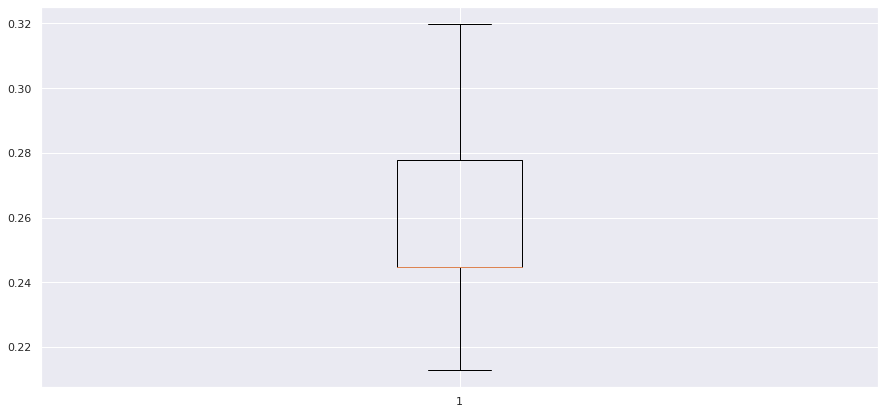

In [ ]:
scoring = 'f1'
#Setting number of splits equal to 5
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)     
cv_result_bfr = cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr);

Metric  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
Score         0.824735       0.823771      0.146738     0.144126   

Metric  Train Precision  Test Precision  Train F1-Score  Test F1-Score  
Score          0.660179        0.649091        0.240108       0.235877

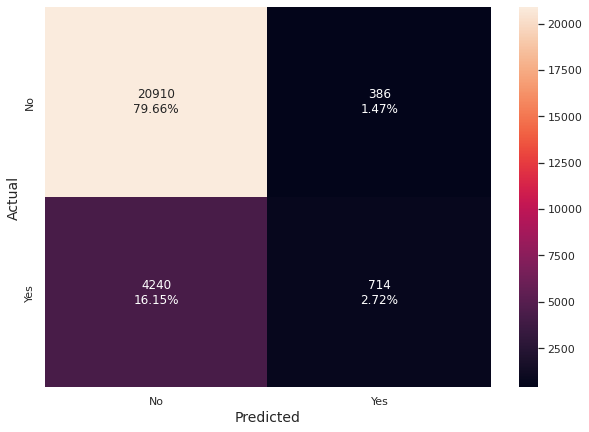

In [ ]:
get_metrics_score(lr)
make_confusion_matrix(lr, y_test)

Oversampling train data

In [156]:
from imblearn.over_sampling import SMOTE

print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1234)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))

print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 11558
Before UpSampling, counts of label 'No': 49692 

After UpSampling, counts of label 'Yes': 49692
After UpSampling, counts of label 'No': 49692 

After UpSampling, the shape of train_X: (99384, 27)
After UpSampling, the shape of train_y: (99384,) 



In [ ]:
log_reg_over = LogisticRegression(random_state=1234,n_jobs=-1)

# Training the basic logistic regression model with the training set 
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression(n_jobs=-1, random_state=1234)

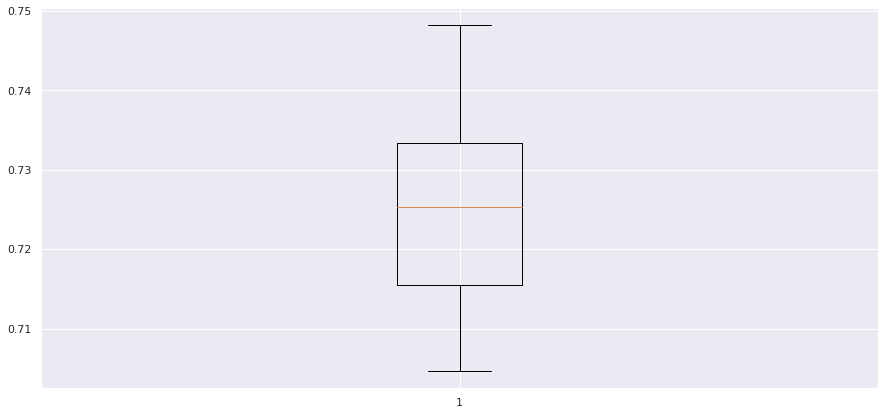

In [ ]:
scoring = 'f1'
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)     #Setting number of splits equal to 10
cv_result_over = cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over);

Metric  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
Score         0.722057       0.724571      0.721492      0.72063   

Metric  Train Precision  Test Precision  Train F1-Score  Test F1-Score  
Score          0.376581        0.379142        0.494867       0.496868

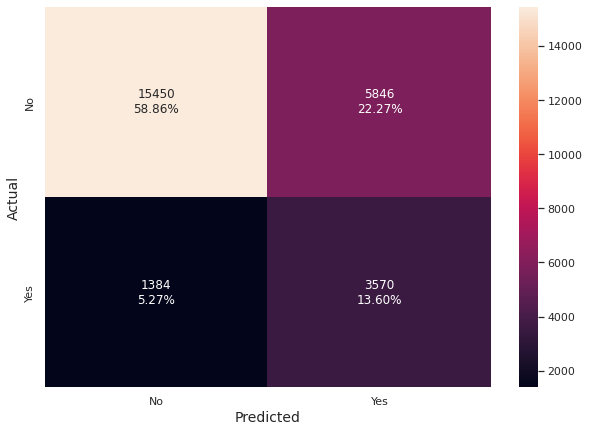

In [ ]:
get_metrics_score(log_reg_over)
make_confusion_matrix(log_reg_over, y_test)

Regularization

In [ ]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1234,n_jobs=-1)

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1, 1.1, 0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='f1', n_jobs=-1)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(n_jobs=-1, random_state=1234)

Metric  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
Score         0.722057       0.724571      0.721492      0.72063   

Metric  Train Precision  Test Precision  Train F1-Score  Test F1-Score  
Score          0.376581        0.379142        0.494867       0.496868

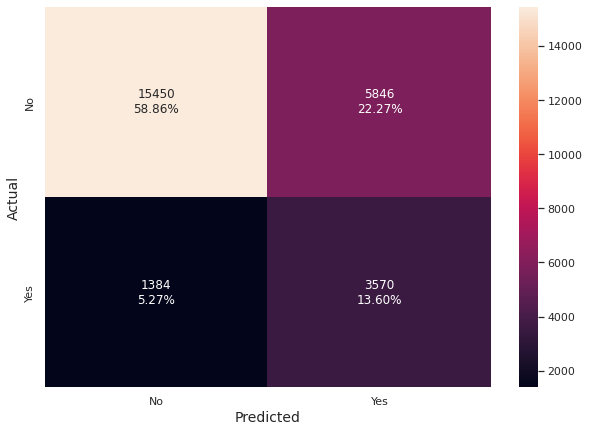

In [ ]:
get_metrics_score(lr_estimator)
make_confusion_matrix(lr_estimator, y_test)

In [ ]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list

models.append(
    (
        "CatBoost",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("cat_boost", CatBoostClassifier(random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "BAGGING",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1, eval_metric='logloss')),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []   # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "f1"
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
    cv_result = cross_val_score(estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold)
    results.append(cv_result)
    names.append(name)

    print(f"{name}: {cv_result.mean() * 100}")

Streaming output truncated to the last 5000 lines.
11:	learn: 0.4410279	total: 147ms	remaining: 12.1s
12:	learn: 0.4325832	total: 159ms	remaining: 12.1s
13:	learn: 0.4247705	total: 170ms	remaining: 12s
14:	learn: 0.4184937	total: 183ms	remaining: 12s
15:	learn: 0.4129572	total: 197ms	remaining: 12.1s
16:	learn: 0.4077096	total: 209ms	remaining: 12.1s
17:	learn: 0.4045643	total: 221ms	remaining: 12s
18:	learn: 0.4005422	total: 233ms	remaining: 12s
19:	learn: 0.3979847	total: 244ms	remaining: 12s
20:	learn: 0.3946773	total: 256ms	remaining: 12s
21:	learn: 0.3923535	total: 268ms	remaining: 11.9s
22:	learn: 0.3895468	total: 279ms	remaining: 11.8s
23:	learn: 0.3879960	total: 292ms	remaining: 11.9s
24:	learn: 0.3856676	total: 308ms	remaining: 12s
25:	learn: 0.3842165	total: 321ms	remaining: 12s
26:	learn: 0.3830159	total: 334ms	remaining: 12s
27:	learn: 0.3814596	total: 346ms	remaining: 12s
28:	learn: 0.3797924	total: 358ms	remaining: 12s
29:	learn: 0.3783643	total: 371ms	remaining: 12s
30:	

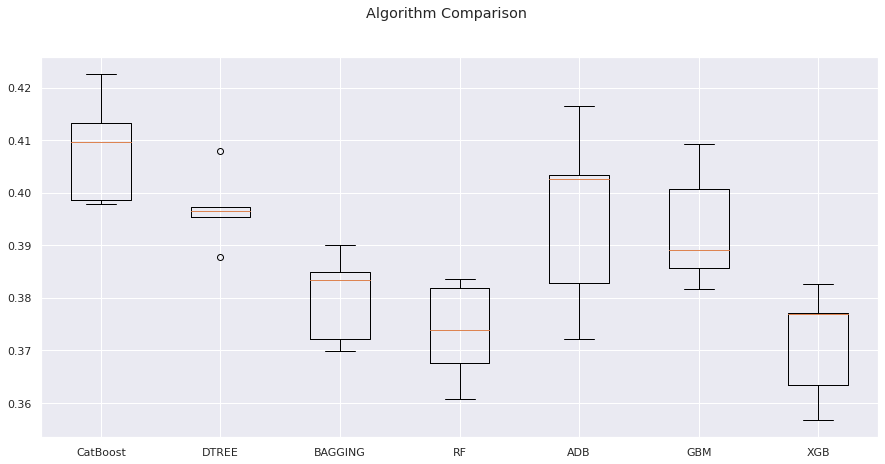

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(15, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names);

### XGBoost Classifier


1. Hyperparameter Tuning using RandomizedSearchCV




In [ ]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1234,eval_metric='logloss', n_estimators=50))

#Parameter grid to pass in RandomizedSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
            'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, 
                                   scoring=scorer, cv=5, random_state=1234, n_jobs=-1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print(f"Best Parameters:{randomized_cv.best_params_} \nScore: {randomized_cv.best_score_}")

Best Parameters:{'xgbclassifier__subsample': 0.8, 'xgbclassifier__scale_pos_weight': 2, 'xgbclassifier__reg_lambda': 2, 'xgbclassifier__n_estimators': 250, 'xgbclassifier__max_depth': 1, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__gamma': 0} 
Score: 0.5297441368874546
CPU times: user 16.3 s, sys: 1.07 s, total: 17.3 s
Wall time: 23min 49s


Metric  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
Score         0.818727       0.815733      0.554681     0.543399   

Metric  Train Precision  Test Precision  Train F1-Score  Test F1-Score  
Score          0.518396        0.511107        0.535925       0.526759

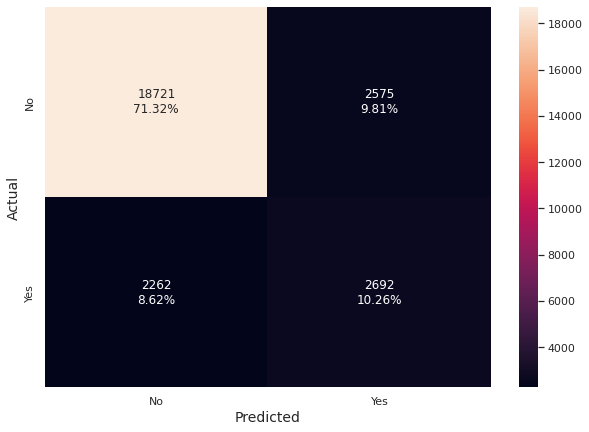

In [ ]:
# Creating new pipeline with best parameters
xgb_tuned = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1234,
        n_estimators=250,
        scale_pos_weight=2,
        reg_lambda=2,
        max_depth=1,
        subsample=0.8,
        learning_rate=0.2,
        gamma=0,
        eval_metric='logloss',
        n_jobs=-1,
        scoring=scorer
    )
)

# Fit the model on training data
xgb_tuned.fit(X_train, y_train)

#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned, y_test)

### Bagging Classifier

*   Hyperparameter tuning using GridSearchCV





In [ ]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1234))

# Parameter grid to pass in GridSearchCV
param_grid = {
    'baggingclassifier__max_samples':  [0.7, 0.8, 0.9, 1], 
    'baggingclassifier__max_features': [0.7, 0.8, 0.9, 1],
    'baggingclassifier__n_estimators': [30, 40, 50, 70]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(f"Best Parameters:{grid_cv.best_params_} \nScore: {grid_cv.best_score_}")

Best Parameters:{'baggingclassifier__max_features': 0.9, 'baggingclassifier__max_samples': 0.9, 'baggingclassifier__n_estimators': 30} 
Score: 0.3817456082592116
CPU times: user 38.7 s, sys: 1.98 s, total: 40.7 s
Wall time: 43min 53s


Metric  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
Score         0.995559       0.835352      0.976813     0.275535   

Metric  Train Precision  Test Precision  Train F1-Score  Test F1-Score  
Score          0.999646         0.65062        0.988097       0.387124

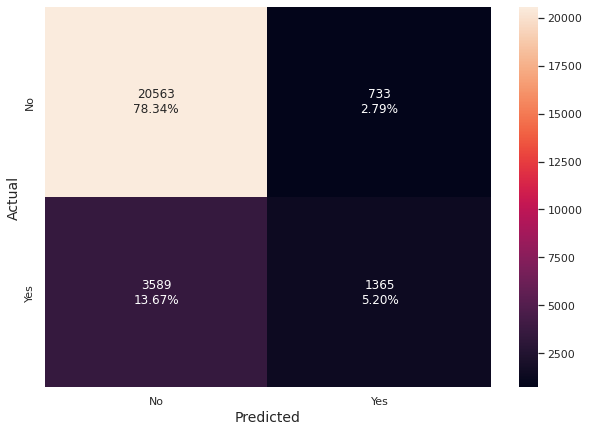

In [ ]:
# Creating new pipeline with best parameters
bagg_tuned = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        max_features=0.9,
        max_samples=0.9,
        random_state=1234,
        n_estimators=30,
        n_jobs=-1
    )
)

# Fit the model on training data
bagg_tuned.fit(X_train, y_train)

#Calculating different metrics
get_metrics_score(bagg_tuned)

#Creating confusion matrix
make_confusion_matrix(bagg_tuned, y_test)

### Decision Tree Classifier


*   Hyperparameter Tuning using GridSearchCV



In [ ]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1234))

# Parameter grid to pass in GridSearchCV
param_grid = {
    'decisiontreeclassifier__max_depth': np.arange(2, 30), 
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10],
    'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10, 15],
    'decisiontreeclassifier__min_impurity_decrease': [0.0001,0.001,0.01,0.1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(f"Best parameters are {grid_cv.best_params_} \nScore={grid_cv.best_score_}:")

Best parameters are {'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__max_leaf_nodes': 15, 'decisiontreeclassifier__min_impurity_decrease': 0.0001, 'decisiontreeclassifier__min_samples_leaf': 1} 
Score=0.37604771074060817:
CPU times: user 2min 10s, sys: 16.2 s, total: 2min 26s
Wall time: 26min 20s


Metric  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
Score          0.83618       0.837333      0.307493     0.308236   

Metric  Train Precision  Test Precision  Train F1-Score  Test F1-Score  
Score          0.636461        0.644304        0.414654       0.416985

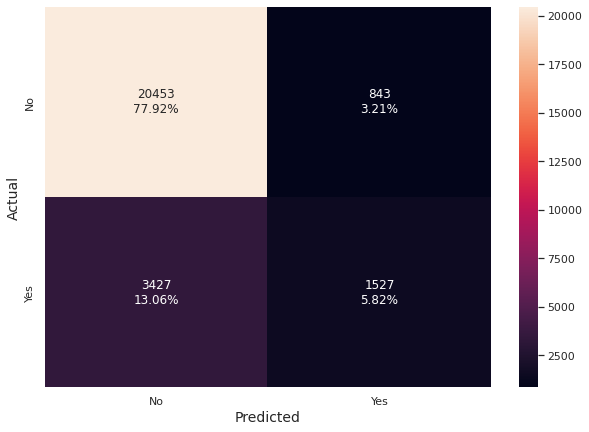

In [ ]:
# Creating new pipeline with best parameters
dtree_tuned = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(
        max_depth=5,
        max_leaf_nodes=15,
        random_state=1234,
        min_impurity_decrease=0.0001,
        min_samples_leaf=1,
        )
)

# Fit the model on training data
dtree_tuned.fit(X_train, y_train)

#Calculating different metrics
get_metrics_score(dtree_tuned)

#Creating confusion matrix
make_confusion_matrix(dtree_tuned, y_test)

### Stacking Classifier

Metric  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
Score         0.918465       0.802324      0.803513     0.566815   

Metric  Train Precision  Test Precision  Train F1-Score  Test F1-Score  
Score          0.773272        0.479918        0.788103       0.519759

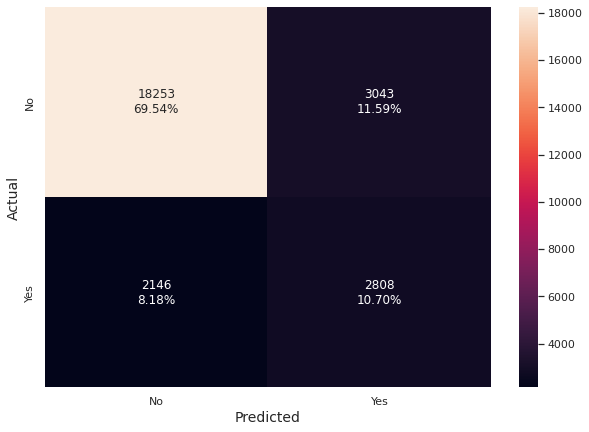

In [ ]:
estimators = [('Bagging Classifier', bagg_tuned), ('Decision Tree', dtree_tuned)]
stacking_classifier= StackingClassifier(estimators=estimators, final_estimator=xgb_tuned)
stacking_classifier.fit(X_train, y_train)

#Calculating different metrics
get_metrics_score(stacking_classifier)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier, y_test)

For now, I will use xgb_tuned model to predict the test set output

### Test set prediction

In [157]:
test_id=df_test.ID

In [ ]:
test_id.head()

0    198980
1    167688
2    198768
3    192564
4    151199
Name: ID, dtype: int64

In [ ]:
pred = xgb_tuned.predict(df2)
print(f"Prediction has length: {len(pred)}")

Prediction has length: 37500


In [ ]:
prediction_dict = {
    'ID': test_id,
    'Loan/No Loan': pred
}
submit_df1 = pd.DataFrame(prediction_dict)
submit_df1.head()

ID  Loan/No Loan
0  198980           1.0
1  167688           0.0
2  198768           1.0
3  192564           1.0
4  151199           0.0

In [ ]:
submit_df1.to_csv('submit_df1.csv', index=False)

In [ ]:
CBC = CatBoostClassifier()
CBC.fit(X_train, y_train, eval_set = (X_test,y_test),cat_features = np.where(df1.dtypes == "object")[0])

Learning rate set to 0.087564
0:	learn: 0.6262940	test: 0.6264233	best: 0.6264233 (0)	total: 56ms	remaining: 56s
1:	learn: 0.5766483	test: 0.5766116	best: 0.5766116 (1)	total: 77.6ms	remaining: 38.7s
2:	learn: 0.5396962	test: 0.5395663	best: 0.5395663 (2)	total: 107ms	remaining: 35.7s
3:	learn: 0.5053182	test: 0.5049951	best: 0.5049951 (3)	total: 156ms	remaining: 38.7s
4:	learn: 0.4783804	test: 0.4777415	best: 0.4777415 (4)	total: 201ms	remaining: 40s
5:	learn: 0.4591515	test: 0.4584980	best: 0.4584980 (5)	total: 228ms	remaining: 37.8s
6:	learn: 0.4440860	test: 0.4434940	best: 0.4434940 (6)	total: 268ms	remaining: 38s
7:	learn: 0.4296891	test: 0.4289805	best: 0.4289805 (7)	total: 321ms	remaining: 39.8s
8:	learn: 0.4206785	test: 0.4199403	best: 0.4199403 (8)	total: 366ms	remaining: 40.3s
9:	learn: 0.4110976	test: 0.4104786	best: 0.4104786 (9)	total: 419ms	remaining: 41.5s
10:	learn: 0.4040488	test: 0.4035133	best: 0.4035133 (10)	total: 458ms	remaining: 41.2s
11:	learn: 0.3969142	test: 0

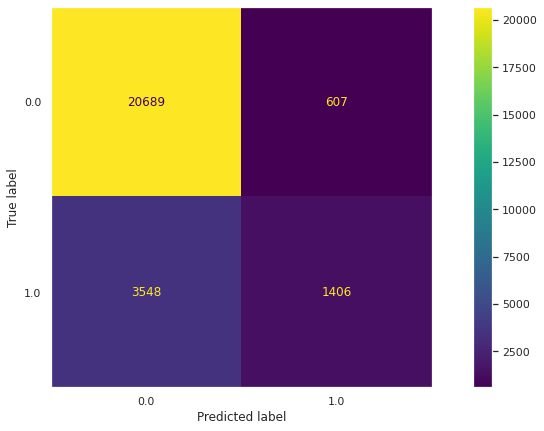

In [ ]:
import sklearn
sklearn.metrics.plot_confusion_matrix(CBC,X_test, y_test)
plt.grid(False)

In [ ]:
from sklearn.metrics import plot_roc_curve

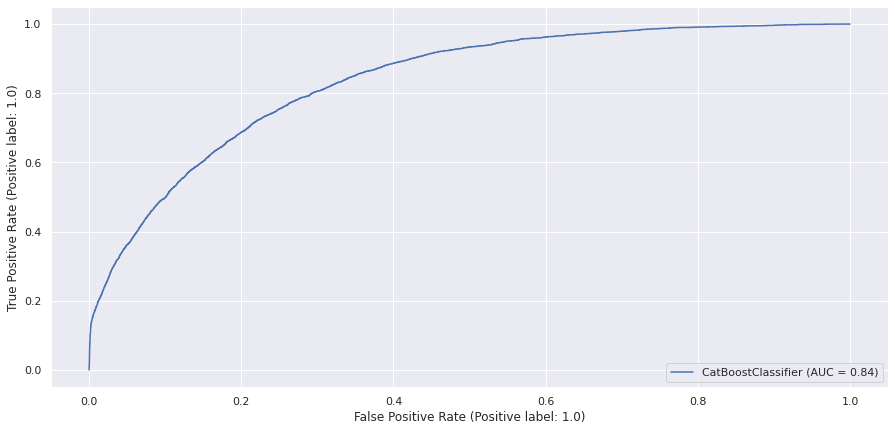

In [ ]:
plot_roc_curve(CBC,X_test,y_test)

In [ ]:
CBC.score(X_test,y_test)

0.8417142857142857

In [ ]:
pred = CBC.predict(df2)
print(f"Prediction has length: {len(pred)}")

Prediction has length: 37500


In [ ]:
prediction_dict = {
    'ID': test_id,
    'Loan/No Loan': pred
}
submit_df2 = pd.DataFrame(prediction_dict)
submit_df2.head()

ID  Loan/No Loan
0  198980           0.0
1  167688           0.0
2  198768           0.0
3  192564           0.0
4  151199           0.0

In [ ]:
submit_df2.to_csv('submit_df2.csv', index=False)

NameError: ignored

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
clf = RandomForestClassifier(n_estimators=300, n_jobs=-1, criterion = 'gini')

calibrated_clf = CalibratedClassifierCV(clf, method='isotonic', cv=5)
calibrated_clf.fit(X_train, y_train)
y_val = calibrated_clf.predict_proba(X_test)



In [ ]:
y_f = [1 if y_val[i][0] < 0.5 else 0 for i in range(len(y_test))]
y_f

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


In [ ]:
sum(y_f == y_test) / len(y_test)

0.8393904761904762

In [ ]:
y_val = calibrated_clf.predict_proba(df2)
y_pred = [1 if y_val[i][0] < 0.5 else 0 for i in range(len(df2))]

In [ ]:
prediction_dict = {
    'ID': test_id,
    'Loan/No Loan': y_pred
}
submit_df3 = pd.DataFrame(prediction_dict)
submit_df3.head()

ID  Loan/No Loan
0  198980             0
1  167688             0
2  198768             0
3  192564             0
4  151199             0

In [ ]:
submit_df3.to_csv('submit_df3.csv', index=False)

In [159]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1234,eval_metric='logloss', n_estimators=50))

#Parameter grid to pass in RandomizedSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(200,350,15),
            'xgbclassifier__scale_pos_weight':[0,1,2,3,4,5,6],
            'xgbclassifier__learning_rate':[0.2,0.3,0.4],
            'xgbclassifier__gamma':[0,1,2,3,5],
            'xgbclassifier__subsample':[0.6,0.7,0.8,0.9,1],
            'xgbclassifier__max_depth':np.arange(1,8,2),
            'xgbclassifier__reg_lambda':[0,1,2,3,4,5,6]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, 
                                   scoring=scorer, cv=5, random_state=1234, n_jobs=-1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print(f"Best Parameters:{randomized_cv.best_params_} \nScore: {randomized_cv.best_score_}")

KeyboardInterrupt: ignored